**EDA Goals**:

We will approach our analysis w.r.to below common goals:

**1. Data Understanding**
   - Data volume
   - Columns and thier data types
   - Numeric vs Categorical Columns

**2. Data Cleaning**
   - Fixing Rows and Columns
   - Treating missing values
   - Standardising values
   - Treating invalid values
   - Filtering data

**3. Data Analysis**
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation b/w features

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dtm
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)

### 1. Data Understanding
1. Data volume
2. Columns and thier data types
3. Numeric vs Categorical Columns

### 1.1 Data volume
- Number of rows are 39,717 rows
- Number of columns are 111 columns
- Number of rows on schema are 115 rows that means there are 115 columns

Summary: number of columns on data set is not equal to number of columns on schema.

In [97]:
df_loan = pd.read_csv("loan.csv", low_memory=False)
print("No. of rows = ", df_loan.shape[0], "and no. of columns = ", df_loan.shape[1])
print("Here is some sample records from top and bottom...")
df_loan.head(3).append(df_loan.tail(3))

No. of rows =  39717 and no. of columns =  111
Here is some sample records from top and bottom...


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [98]:
# Load schema of data set
schema_loan = pd.read_excel('Data_Dictionary.xlsx')
schema_loan.dropna(inplace=True)
print("No. of rows = ", schema_loan.shape[0], "and no. of columns = ", schema_loan.shape[1])
print("Here is some sample records from top and bottom...")
schema_loan.head(3).append(schema_loan.tail(3))

No. of rows =  115 and no. of columns =  2
Here is some sample records from top and bottom...


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...


### 1.2 Columns and their data types
- There are 74 columns of float64 type 
- There are 13 columns of int64 type
- There are 24 columns of object/string type

In [99]:
#Print all the columns and their data types
print(df_loan.info(verbose='all', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [100]:
# Count all data types of all columns
print(df_loan.dtypes.value_counts())

float64    74
object     24
int64      13
dtype: int64


### 1.3 Numeric vs Categorical Columns
- Number of numeric columns is 24 columns
- Number of categorical columns is 87 columns

In [101]:
# Filter Numeric vs Categorical Columns
numeric_columns = list(df_loan.select_dtypes(exclude='object'))
categorical_columns = list(df_loan.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 24
['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']
numeric columns length: 87
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur

### 2. Data Cleaning
1. Fixing Rows and Columns
2. Treating missing values
3. Standardising values
4. Treating invalid values
5. Filtering data

#### 2.1 Fixing Rows and Columns

In [102]:
df_loan[numeric_columns].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [103]:
# Delete unidentified, irrelevant numeric columns base on schema description on each column and columns have min and max are zero
df_loan.drop(columns=['id', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], inplace=True)

In [104]:
df_loan[categorical_columns].describe()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,26527,14,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,210,18641,2184,597,7099,370,977,39717,1256,1125,10308,39717


In [105]:
# Delete unidentified, irrelevant categorical columns base on schema description on each column and extrem unique values
df_loan.drop(columns=['desc', 'url', 'zip_code','pymnt_plan', 'application_type', 'initial_list_status', 'emp_title', 'title', 'last_pymnt_d', 'last_credit_pull_d'], inplace=True)

In [106]:
# Filter Numeric vs Categorical Columns again
numeric_columns = list(df_loan.select_dtypes(exclude='object'))
categorical_columns = list(df_loan.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 14
['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util', 'next_pymnt_d']
numeric columns length: 81
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi

#### 2.2 Treating missing values

In [107]:
# Count number of columns have null value
count_nan_columns = (df_loan.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 60


In [108]:
# Filter all null columns have row length which equal to row length of data set 
len(df_loan.columns[df_loan.isnull().sum() == len(df_loan.index)])

54

In [109]:
# Delete all null columns
df_loan.dropna(axis=1 ,how='all', inplace=True)

In [110]:
# Count number of columns have null value
count_nan_columns = (df_loan.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 6


In [111]:
# Check the missing values % in each column
print(round(df_loan.isnull().sum()/len(df_loan.index), 4)*100)

member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.13
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymn

##### So, we can notice that missing values ranges from 0.1% to 97.1 %. Let's delete the columns that have more than 10% as null values.

In [112]:
# Let's check all the column where we have more than 10 % missing data
missing_columns = df_loan.columns[100*(df_loan.isnull().sum()/len(df_loan.index)) > 10]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 3
Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [113]:
# Delete these these above columns
df_loan = df_loan.drop(missing_columns, axis=1)
count_nan_columns = (df_loan.isnull().sum(axis=0) > 0).sum()
print("No of columns that has null values: " + str(count_nan_columns))

No of columns that has null values: 3


In [114]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [115]:
# Check number of rows have NaN values on number of columns over a row
number_of_nan_rows = df_loan.isnull().sum(axis=1).sort_values(ascending=False).value_counts()
df_number_of_nan_rows = pd.DataFrame(dict({"no_columns": number_of_nan_rows.index, "no_rows": number_of_nan_rows.values}))
print(df_number_of_nan_rows)

   no_columns  no_rows
0           0    37898
1           1     1816
2           2        3


In [116]:
# Remove row index is 0 because that is number of rows don't have any columns which contains NaN values
df_number_of_nan_rows.drop(index=0, inplace=True)

In [117]:
# Check the % missing values on number of columns over a row
print("Percentage of number of columns:")
df_number_of_nan_rows['percentage_of_columns_over_row'] = round(df_number_of_nan_rows.no_columns / len(df_loan.columns) * 100, 3)
print(df_number_of_nan_rows[['no_columns', 'percentage_of_columns_over_row']])

Percentage of number of columns:
   no_columns  percentage_of_columns_over_row
1           1                           2.632
2           2                           5.263


#### As above results, we don't need to remove any rows because the % missing values of rows are not significant in number, as this would not impact the analysis

In [118]:
# Let's check all the column where we have missing data
missing_columns = df_loan.columns[100*(df_loan.isnull().sum()/len(df_loan.index)) > 0]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 3
Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')


In [119]:
df_loan.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [120]:
# Fill missing values for emp_length column
df_loan.emp_length.fillna(value='0', inplace=True)

In [121]:
# Fill missing values for revol_util column
revol_util_mode = df_loan.revol_util.mode()[0]
df_loan.revol_util.fillna(value=revol_util_mode, inplace=True)

In [122]:
# Fill missing values for pub_rec_bankruptcies column
pub_rec_bankruptcies_mode = df_loan.pub_rec_bankruptcies.mode()[0]
df_loan.pub_rec_bankruptcies.fillna(value=pub_rec_bankruptcies_mode, inplace=True)

In [123]:
# Let's check all the column where we have missing data
missing_columns = df_loan.columns[100*(df_loan.isnull().sum()/len(df_loan.index)) > 0]
print("No. of such columns are:", len(missing_columns))
print(missing_columns)

No. of such columns are: 0
Index([], dtype='object')


#### 2.3 Standardising values

In [124]:
# Filter Numeric vs Categorical Columns again
numeric_columns = list(df_loan.select_dtypes(exclude='object'))
categorical_columns = list(df_loan.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 13
['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util']
numeric columns length: 25
['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'pub_rec_bankruptcies']


In [125]:
df_loan[numeric_columns].describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.042501
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.202603
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.000000
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.000000
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,2.000000


Remove outliers
- annual_inc
- loan_amnt

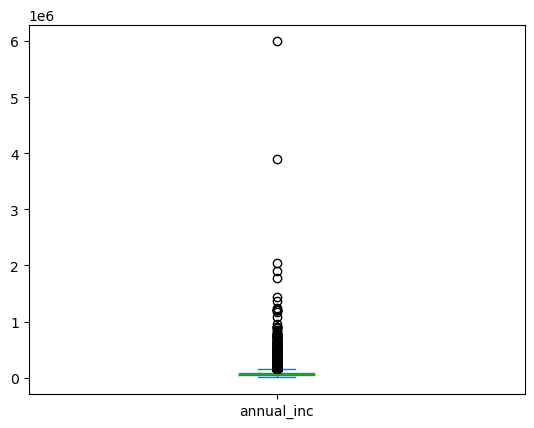

In [126]:
df_loan.annual_inc.plot.box()
plt.show()

In [127]:
quantiles = df_loan.annual_inc.quantile([0.25,0.50,0.75,0.95,0.99])

In [128]:
iqr = quantiles[0.75] - quantiles[0.25]
upper_limit_outlier = quantiles[0.75] + 1.5*iqr
df_loan = df_loan[df_loan.annual_inc <= upper_limit_outlier]

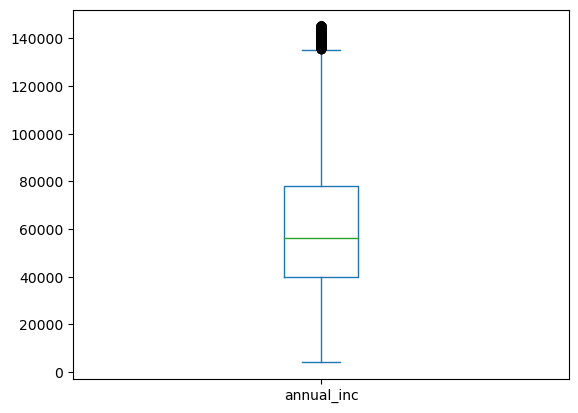

In [129]:
df_loan.annual_inc.plot.box()
plt.show()

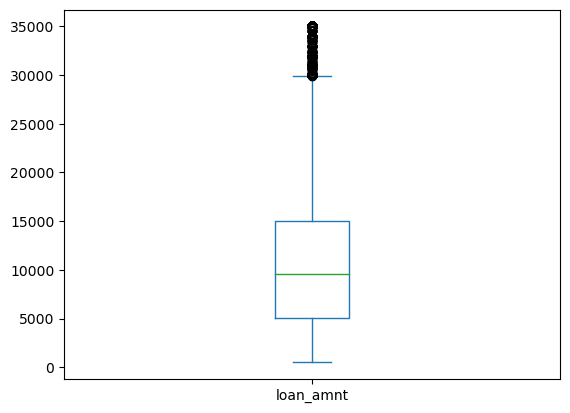

In [130]:
df_loan.loan_amnt.plot.box()
plt.show()

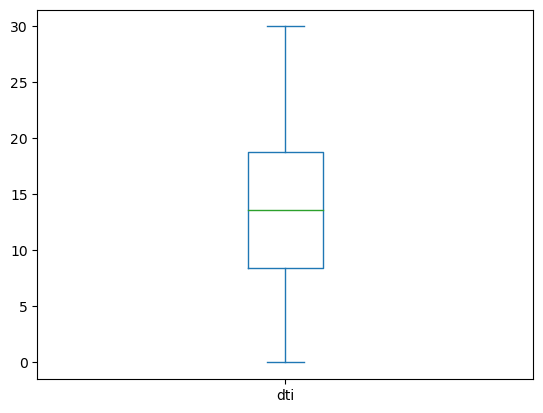

In [131]:
df_loan.dti.plot.box()
plt.show()

In [132]:
df_loan[categorical_columns].describe()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util
count,37874,37874,37874,37874,37874,37874,37874,37874,37874,37874,37874,37874,37874
unique,2,370,7,35,12,5,3,55,3,14,50,523,1083
top,36 months,10.99%,B,A4,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,CA,Oct-99,0%
freq,27838,911,11478,2772,8289,18469,16545,2179,31386,17929,6726,358,963


Remove extra characters
- emp_length
- term
- int_rate

In [133]:
# Remove extra characters for emp_length column
df_loan['emp_length'] = df_loan.emp_length.apply(lambda x: '0' if x[0] == '<' else '10' if x.startswith('10+') else str(x[0]))

In [134]:
# Remove extra characters for term column
df_loan.term = df_loan.term.apply(lambda x: x.strip()[:2])

In [135]:
# Remove extra characters for int_rate column
df_loan.int_rate = df_loan.int_rate.apply(lambda x: x[:-1])

In [136]:
df_loan.sub_grade = df_loan.sub_grade.apply(lambda x: int(x[-1]))

#### 2.4 Treating invalid values

Correct values not in the list: Remove values that don’t belong to a list of data set
- home_ownership
- verification_status

In [137]:
home_ownership = list(['RENT', 'OWN', 'MORTGAGE', 'OTHER'])
df_loan.drop(index=df_loan[df_loan.home_ownership.isin(home_ownership) == False].index, inplace=True)

In [138]:
df_loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

verification_status column has values that belong to a list of data set

In [139]:
df_loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

Convert incorrect data types: Correct the incorrect data types to the correct data types for ease of analysis
- issue_d
- term
- int_rate
- emp_length

In [140]:
df_loan.issue_d = df_loan.issue_d.apply(lambda x: dtm.datetime.strptime(x, "%b-%y"))

Extract month and year from issue_d for analysis

In [141]:
df_loan['issue_month'] = df_loan.issue_d.apply(lambda x: x.month)
df_loan['issue_year'] = df_loan.issue_d.apply(lambda x: x.year)

In [142]:
df_loan.head(3).append(df_loan.tail(3))

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies,issue_month,issue_year
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,1,0.0,12,2011
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,1,0.0,12,2011
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,649.91,1,0.0,12,2011
39713,90607,8500,8500,875.0,36,10.28,275.38,C,1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.0,0.00,0.00,281.94,1,0.0,7,2007
39714,90390,5000,5000,1325.0,36,8.07,156.84,A,4,0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.00,0.00,0.00,1,0.0,7,2007
39716,86999,7500,7500,800.0,36,13.75,255.43,E,2,0,OWN,22000.0,Not Verified,2007-06-01,Fully Paid,debt_consolidation,MA,14.29,1,Oct-03,0,7,0,4175,51.50%,8,0.0,0.0,9195.263334,980.83,7500.00,1695.26,0.0,0.00,0.00,256.59,1,0.0,6,2007


In [143]:
df_loan.term = df_loan.term.astype('int')

In [144]:
df_loan.int_rate = df_loan.int_rate.astype('float')

In [145]:
df_loan.emp_length = df_loan.emp_length.astype('int')

#### Create new column with defaulted name to mark defaulted applicants

In [146]:
df_loan['defaulted'] = df_loan.loan_status.apply(lambda x: 1 if x == 'Charged Off' else 0)

#### 2.5 Filtering Data

Deduplicate data: Remove identical rows, remove rows where some columns are identical

Conclusion: There are not any duplicated rows and columns

In [147]:
df_loan.duplicated().sum()

0

In [148]:
df_loan.columns.duplicated().sum()

0

Filter columns: Pick columns relevant to the analysis

In [149]:
df_analysis = df_loan[['member_id', 'annual_inc', 'loan_amnt', 'funded_amnt_inv', 'int_rate', 
                       'issue_d', 'emp_length', 'loan_status', 'purpose', 'term', 'dti', 'home_ownership', 'defaulted',
                       'grade', 'sub_grade', 'pub_rec_bankruptcies', 'installment', 'verification_status', 'issue_month', 'issue_year']]

#### The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
- We cannot make anything up for the current loans. 
- To exclude that data , removing the records with current loan status

In [150]:
import warnings
warnings.filterwarnings("ignore")
#creating bins for int_rate, annual_inc, installment, funded_amnt_inv, loan_amnt and dti
df_analysis['int_rate_groups'] = pd.cut(df_analysis['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
df_analysis['annual_inc_groups'] = pd.cut(df_analysis['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

df_analysis['installment_groups'] = pd.cut(df_analysis['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
df_analysis['funded_amnt_inv_group'] = pd.cut(df_analysis['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
df_analysis['loan_amnt_groups'] = pd.cut(df_analysis['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
df_analysis['dti_groups'] = pd.cut(df_analysis['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


In [151]:
df_analysis = df_analysis[df_analysis.loan_status != 'Current']

### Filter data to 2 data set with defaulted and undefauted

In [152]:
df_analysis_defaulted = df_analysis[df_analysis.defaulted == 1]
df_analysis_undefaulted = df_analysis[df_analysis.defaulted == 0]

### 3. Data Analysis
1. Univariate Analysis
2. Bivariate Analysis
3. Correlation b/w features

In [153]:
# Filter Numeric vs Categorical Columns again
numeric_columns = list(df_analysis.select_dtypes(exclude='object'))
categorical_columns = list(df_analysis.select_dtypes(include='object'))
print("categorical columns length: " + str(len(categorical_columns)))
print(categorical_columns)
print("numeric columns length: " + str(len(numeric_columns)))
print(numeric_columns)

categorical columns length: 5
['loan_status', 'purpose', 'home_ownership', 'grade', 'verification_status']
numeric columns length: 21
['member_id', 'annual_inc', 'loan_amnt', 'funded_amnt_inv', 'int_rate', 'issue_d', 'emp_length', 'term', 'dti', 'defaulted', 'sub_grade', 'pub_rec_bankruptcies', 'installment', 'issue_month', 'issue_year', 'int_rate_groups', 'annual_inc_groups', 'installment_groups', 'funded_amnt_inv_group', 'loan_amnt_groups', 'dti_groups']


#### 3.1 Univariate Analysis
##### Categorical Variables
- loan_status
- verification_status
- home_ownership
- grade
- sub_grade
- emp_length
- term
- purpose
- issue_month
- issue_year

In [154]:
def countplot2axes(data: list, x: any = None, y: any = None, figsize=(15,7)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.countplot(data=data[0], x=x, y=y)
    plt.title(label='Defaulted Applicants')

    plt.subplot(122)
    sns.countplot(data=data[1], x=x, y=y)
    plt.title(label='UnDefaulted Applicants')
    
    plt.show()

def boxplot2axes(data: list, x: any = None, y: any = None, figsize=(25,7)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(data=data[0], x=x, y=y)
    plt.title(label='Defaulted Applicants')

    plt.subplot(122)
    sns.boxplot(data=data[1], x=x, y=y)
    plt.title(label='UnDefaulted Applicants')
    
    plt.show()

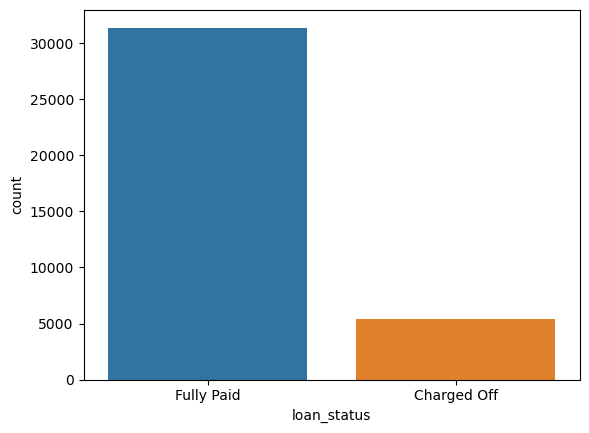

In [155]:
sns.countplot(data=df_analysis, x='loan_status')
plt.show()

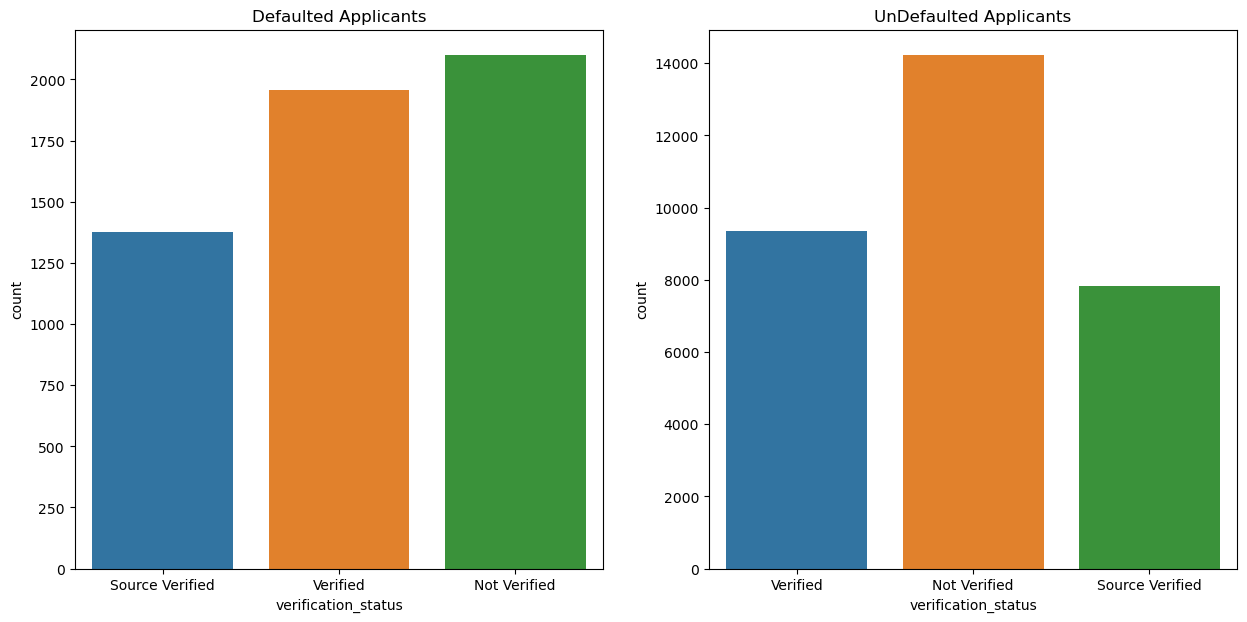

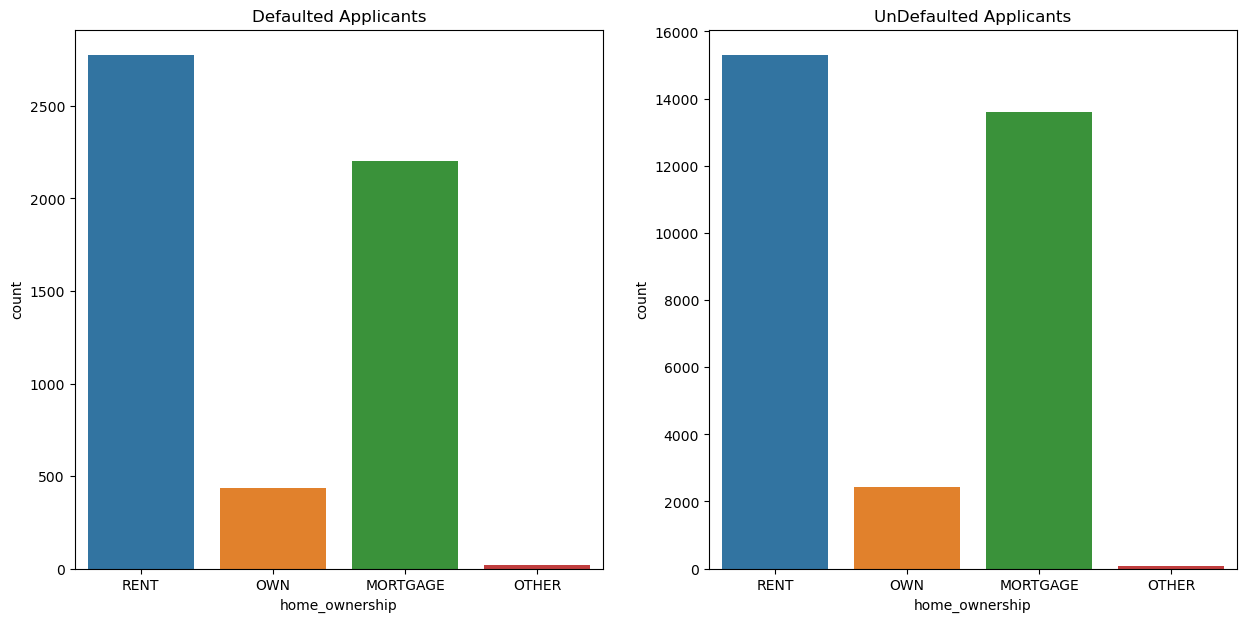

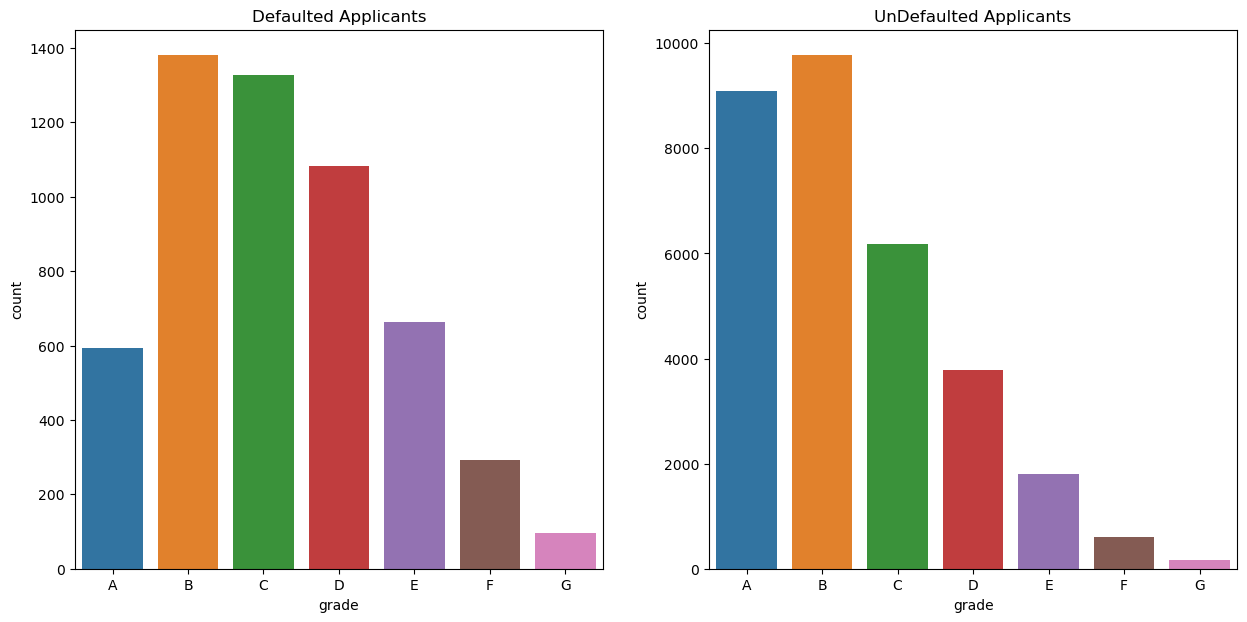

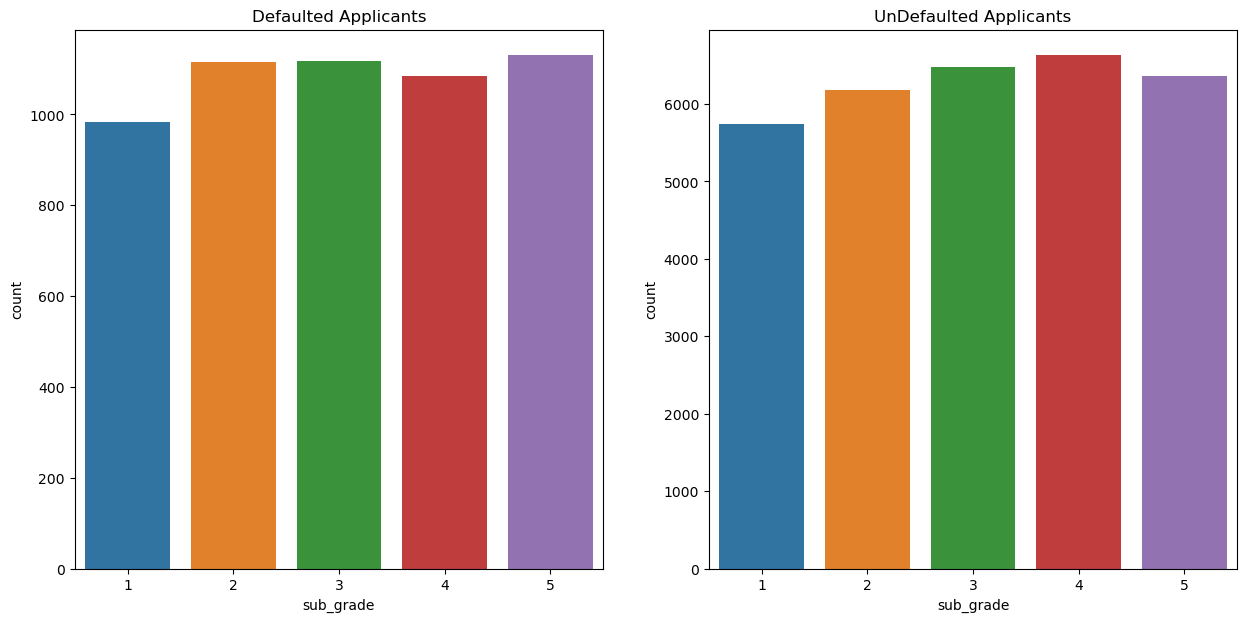

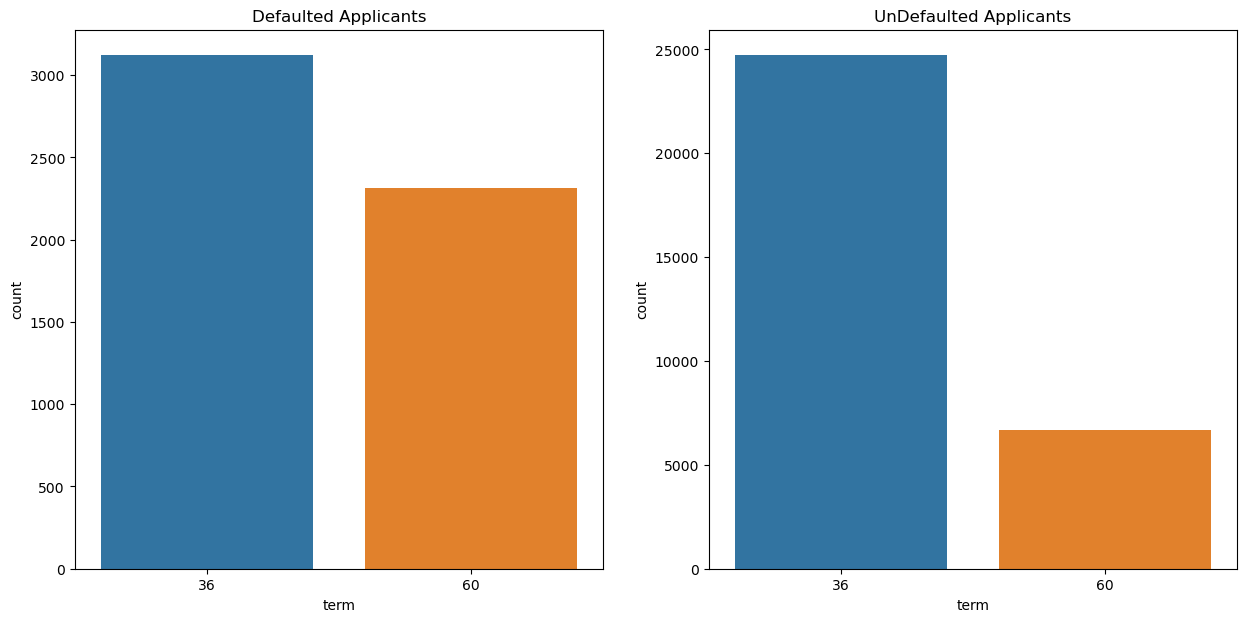

In [156]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], 'verification_status')
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], 'home_ownership')
countplot2axes([df_analysis_defaulted.sort_values(by='grade'), df_analysis_undefaulted.sort_values(by='grade')], 'grade')
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], 'sub_grade')
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], 'term')

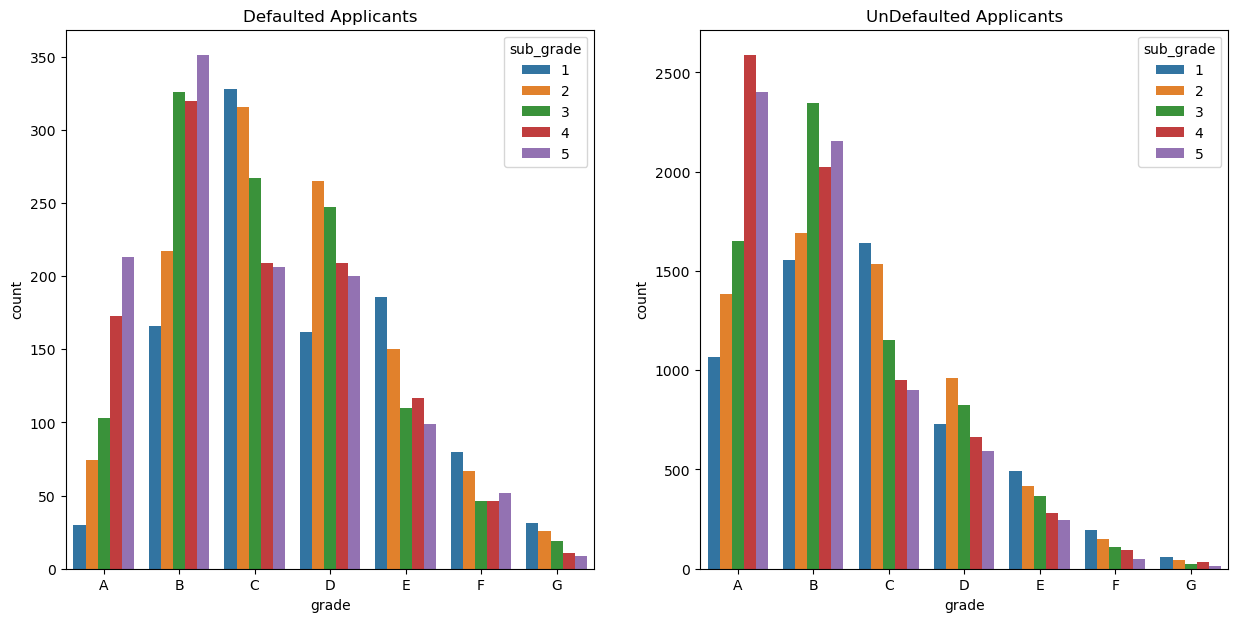

In [157]:
#Charged Off sub grade analysis
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df_analysis_defaulted)
plt.title(label='Defaulted Applicants')
plt.subplot(122)
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df_analysis_undefaulted)
plt.title(label='UnDefaulted Applicants')
plt.show()

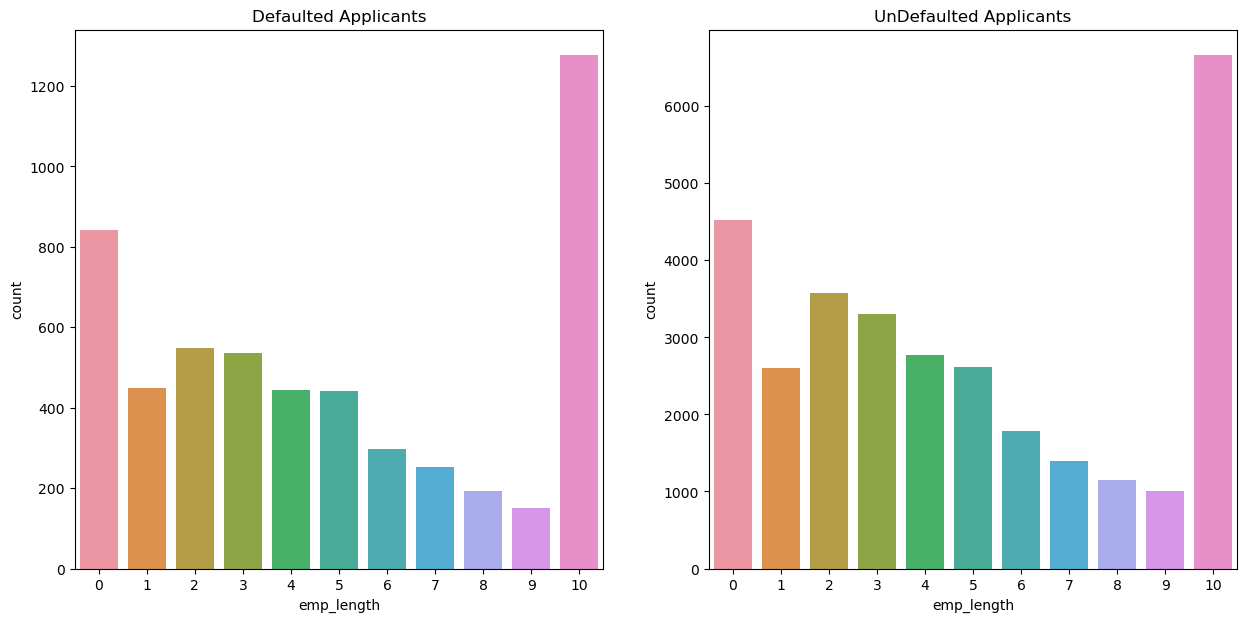

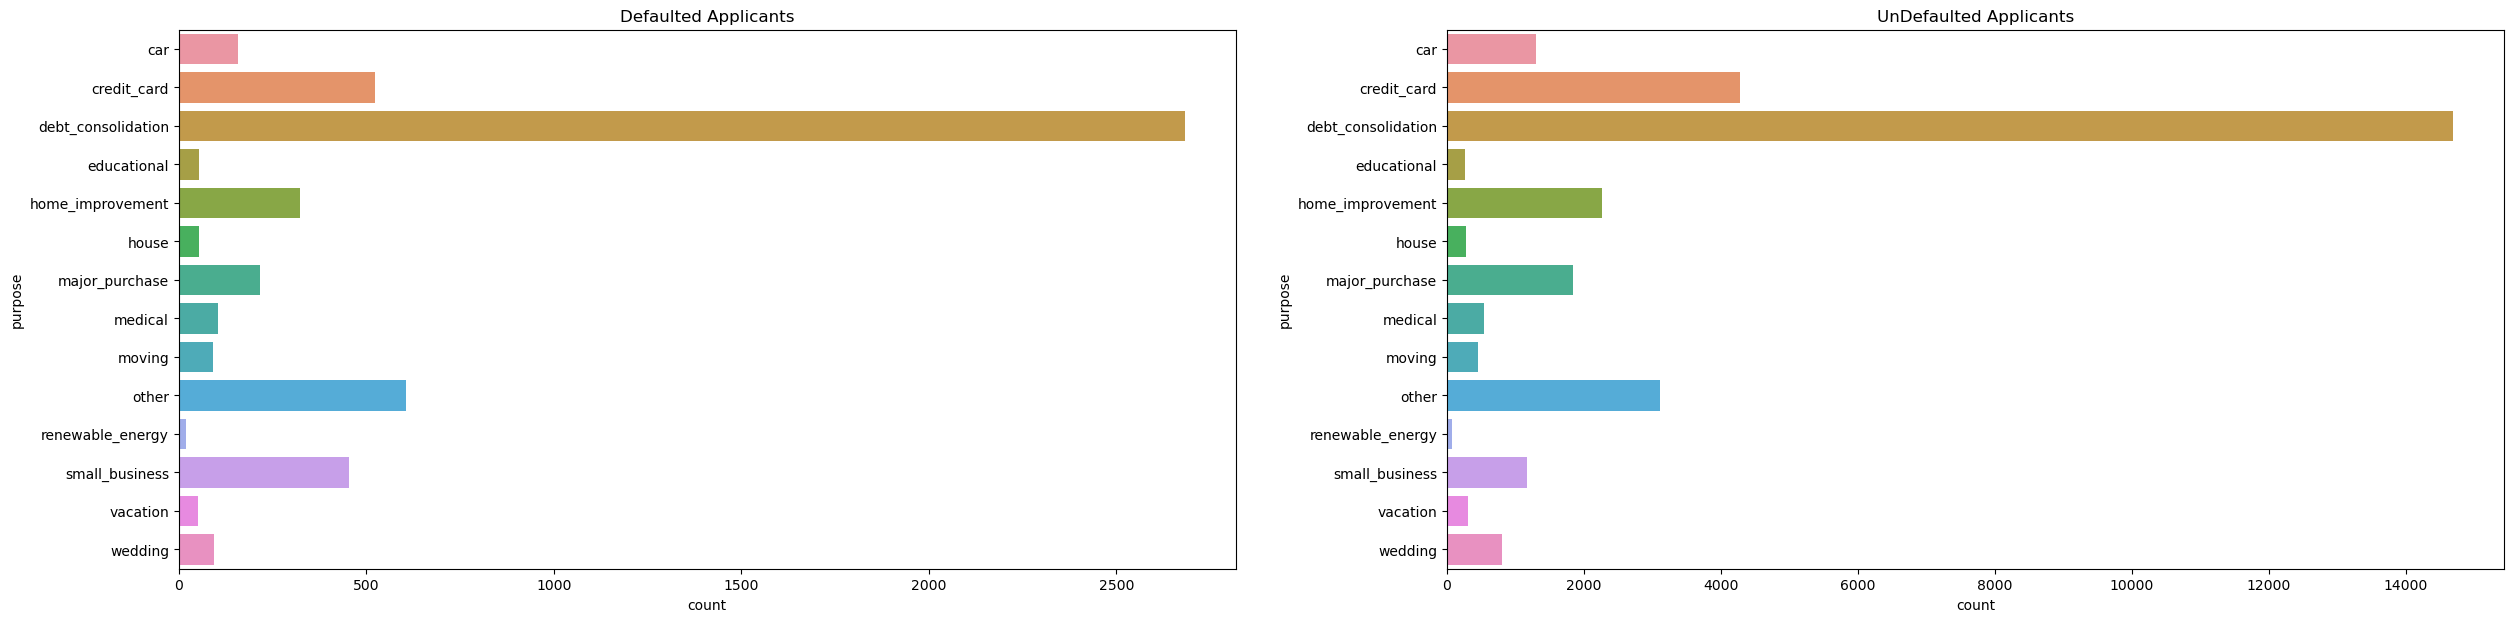

In [158]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='emp_length', figsize=(15,7))
countplot2axes([df_analysis_defaulted.sort_values(by='purpose'), df_analysis_undefaulted.sort_values(by='purpose')], y='purpose', figsize=(30,7))

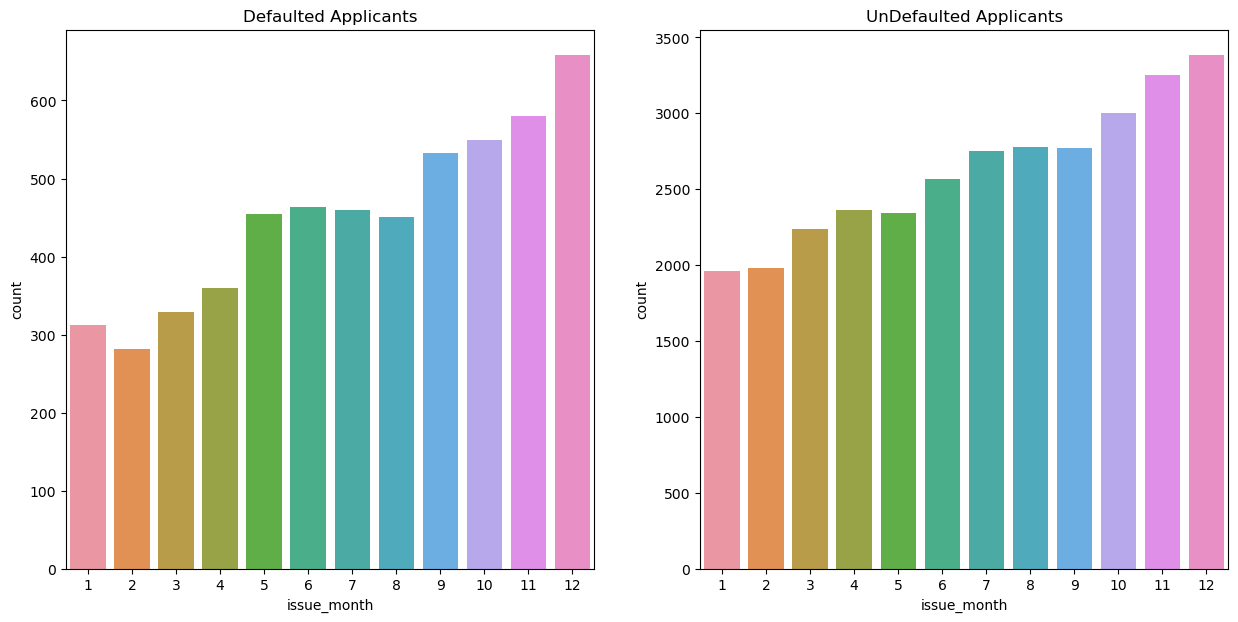

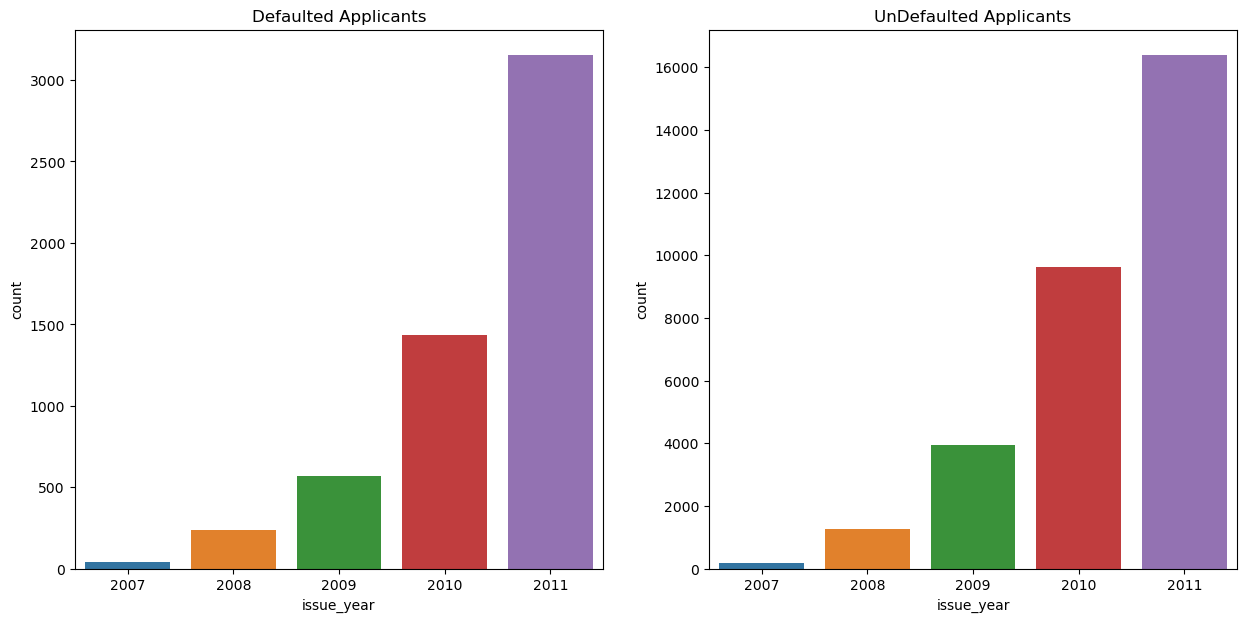

In [159]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='issue_month', figsize=(15,7))
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='issue_year', figsize=(15,7))

#### Quantitative Variables
- annual_inc
- loan_amnt
- dti
- int_rate

#### Analysis loan status
- Analysis loan status with annual income
- Analysis loan status with loan amount
- Analysis loan status with dti
- Analysis loan status with interated rate

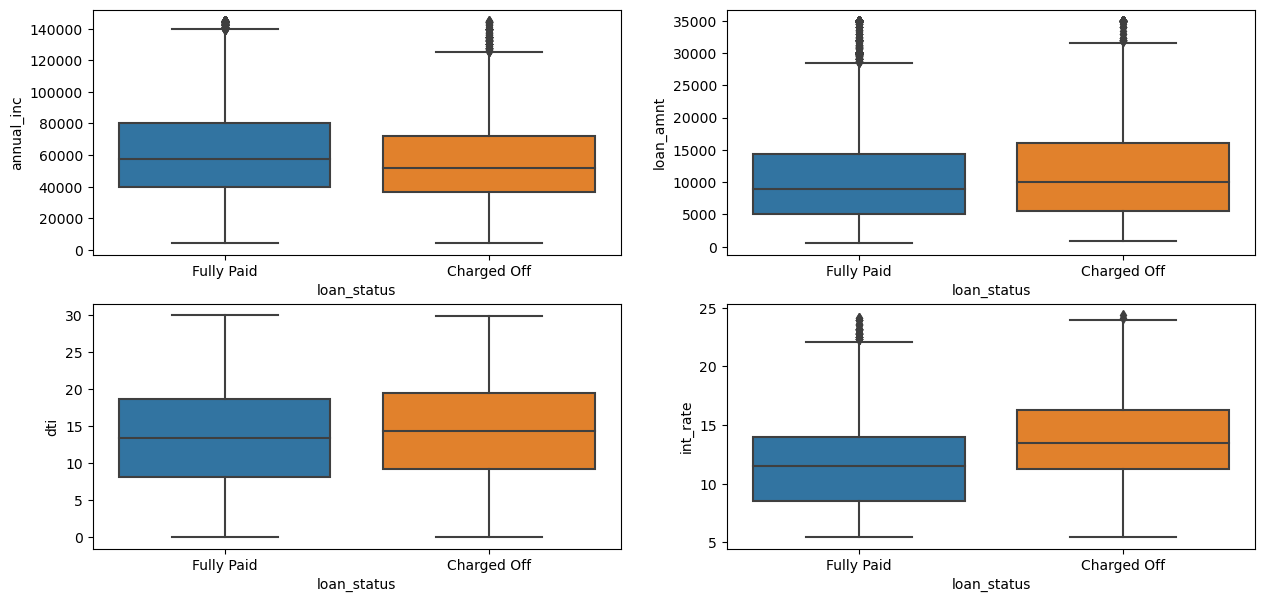

In [160]:
plt.figure(figsize=(15,7))
plt.subplot(221)
sns.boxplot(data=df_analysis, x='loan_status', y='annual_inc')
plt.subplot(222)
sns.boxplot(data=df_analysis, x='loan_status', y='loan_amnt')
plt.subplot(223)
sns.boxplot(data=df_analysis, x='loan_status', y='dti')
plt.subplot(224)
sns.boxplot(data=df_analysis, x='loan_status', y='int_rate')

plt.show()

#### Analysis home ownership
- Analysis home ownership with annual income
- Analysis home ownership with loan amount
- Analysis home ownership with dti
- Analysis home ownership with interated rate

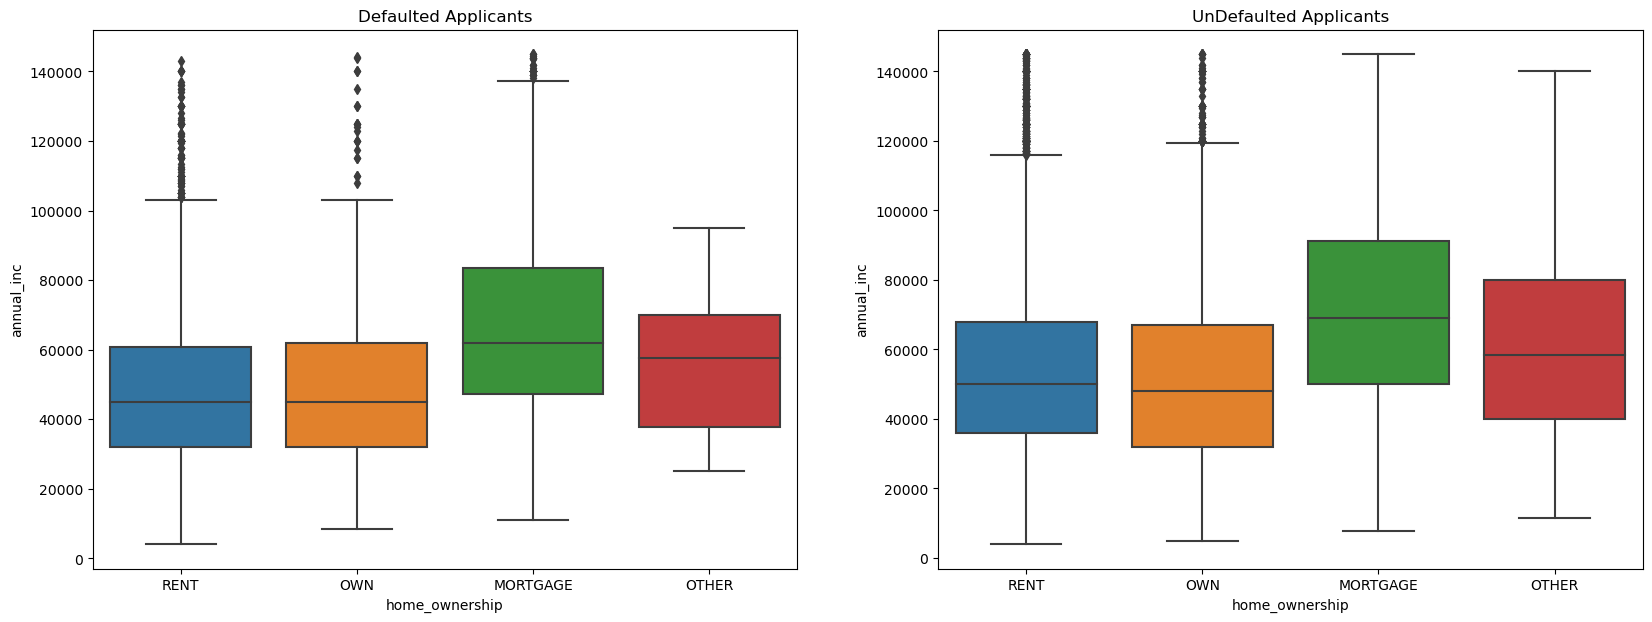

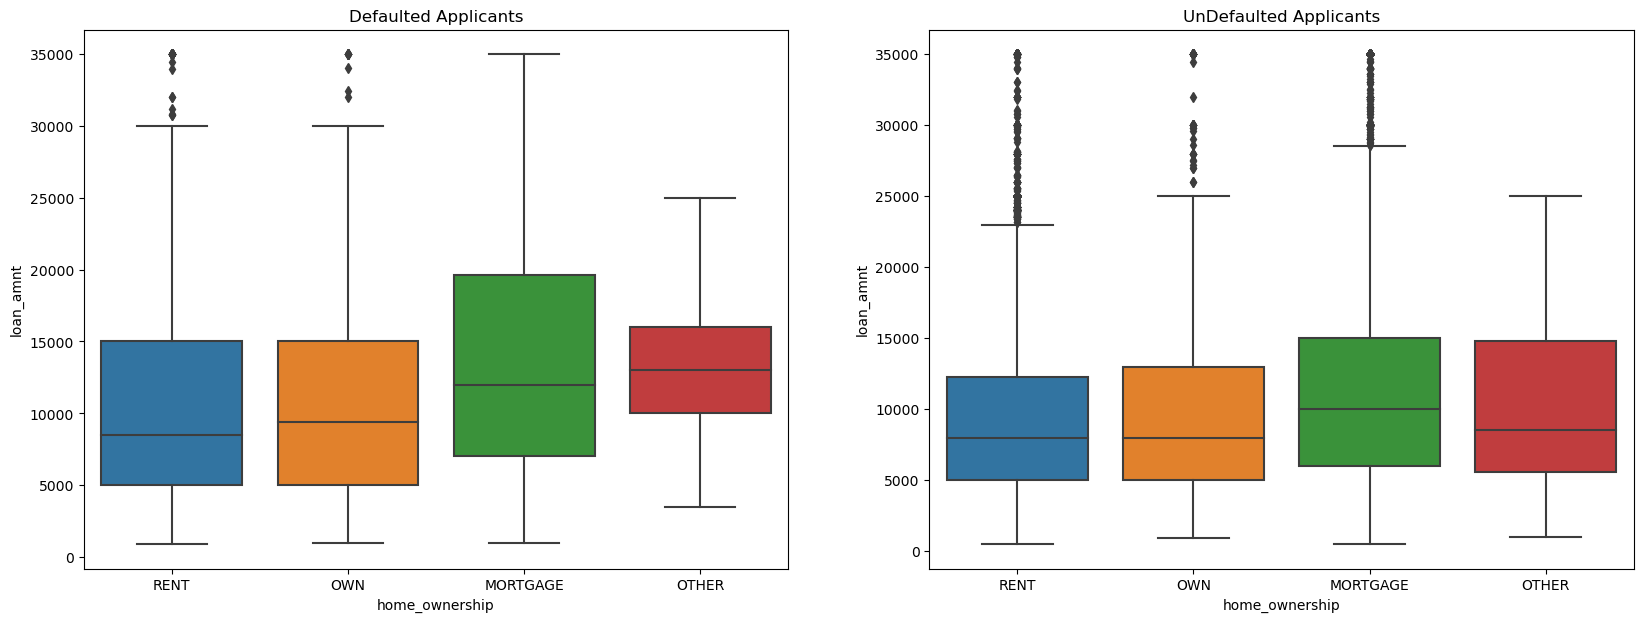

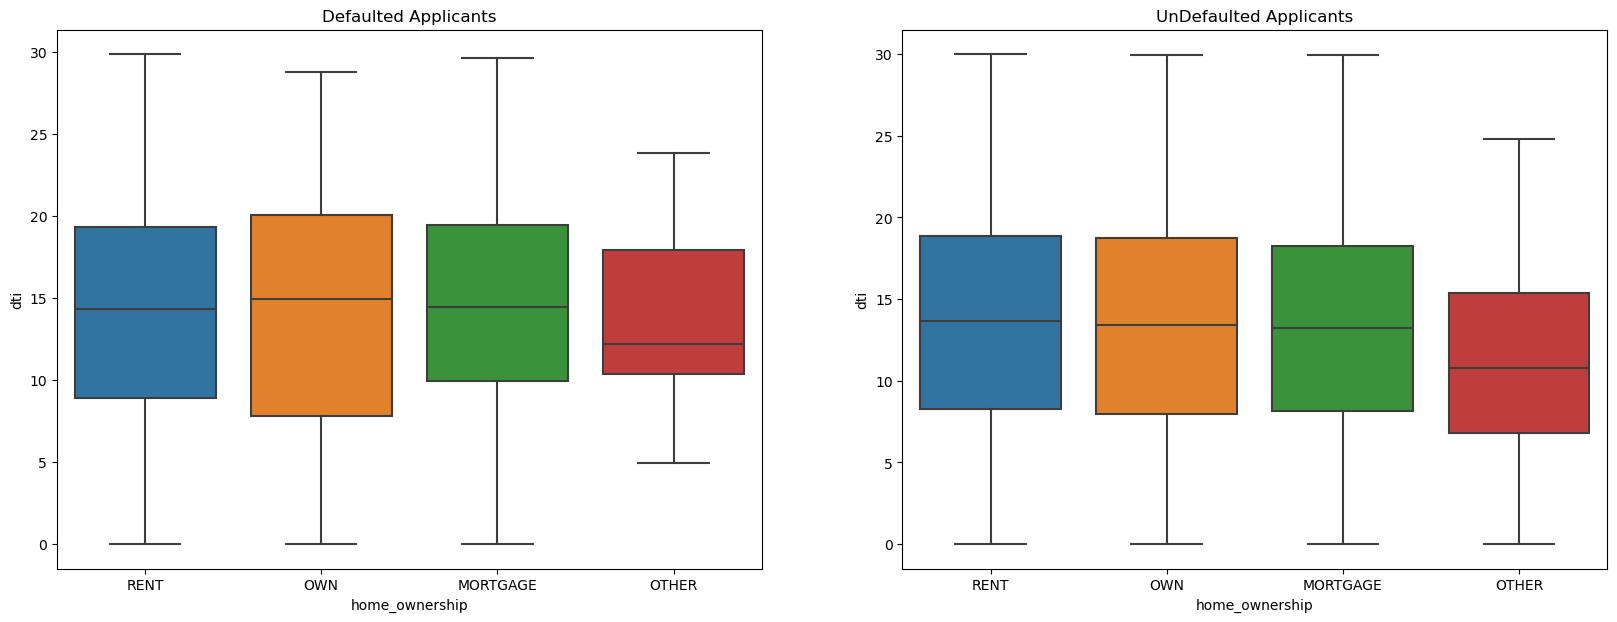

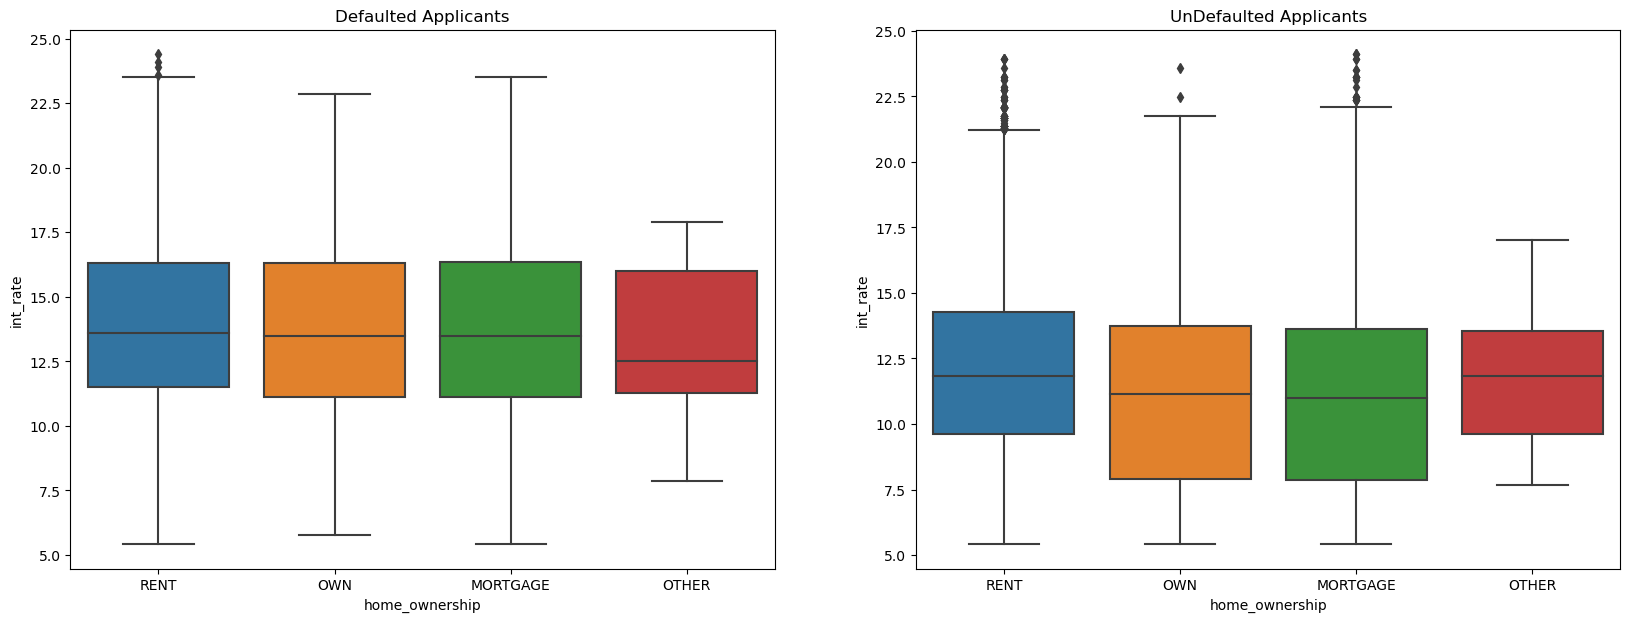

In [161]:
boxplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='home_ownership', y='annual_inc', figsize=(20,7))
boxplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='home_ownership', y='loan_amnt', figsize=(20,7))
boxplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='home_ownership', y='dti', figsize=(20,7))
boxplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='home_ownership', y='int_rate', figsize=(20,7))

#### Analyzing interest rate with the interest rate bins created

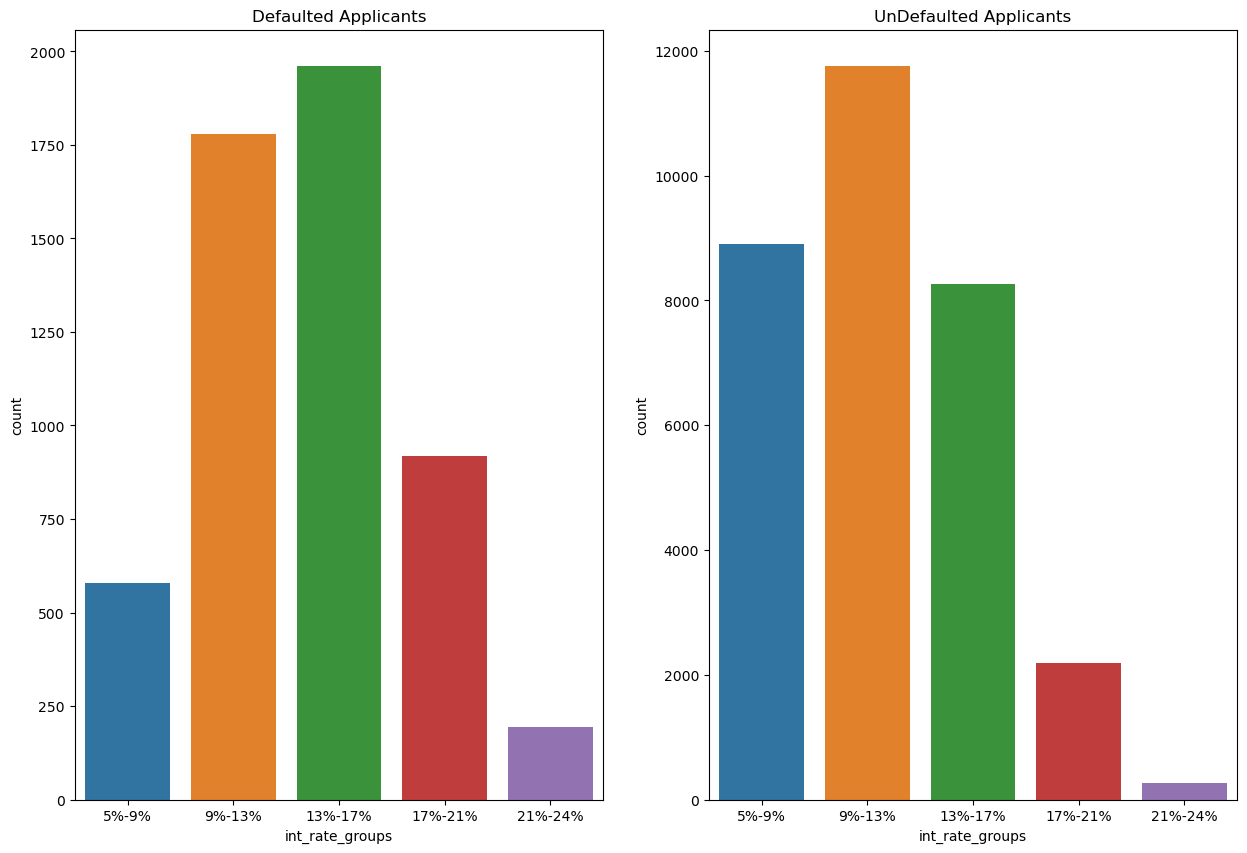

In [162]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='int_rate_groups', figsize=(15,10))

#### Analyzing annual income with the annual income bins created

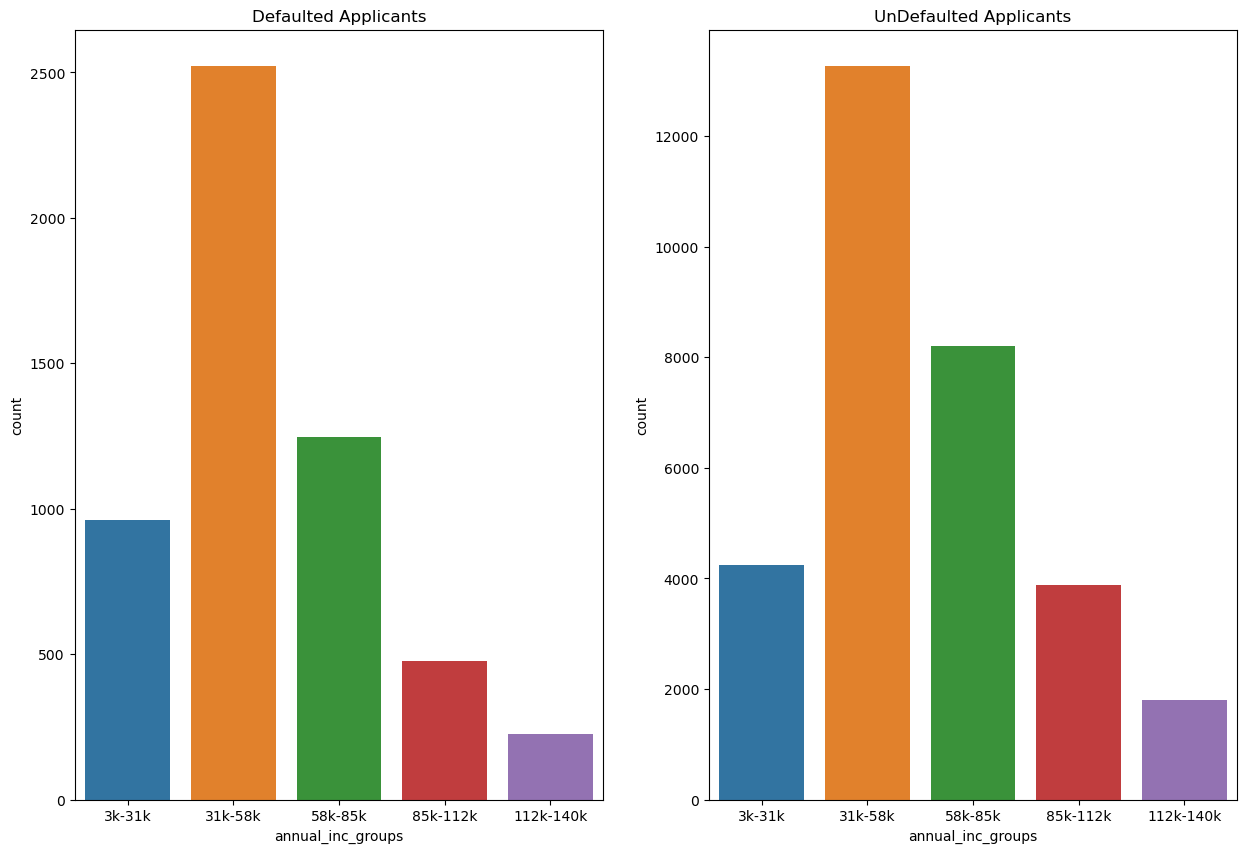

In [163]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='annual_inc_groups', figsize=(15,10))

#### Analyzing funded amount investor with the funded amount investor bins created

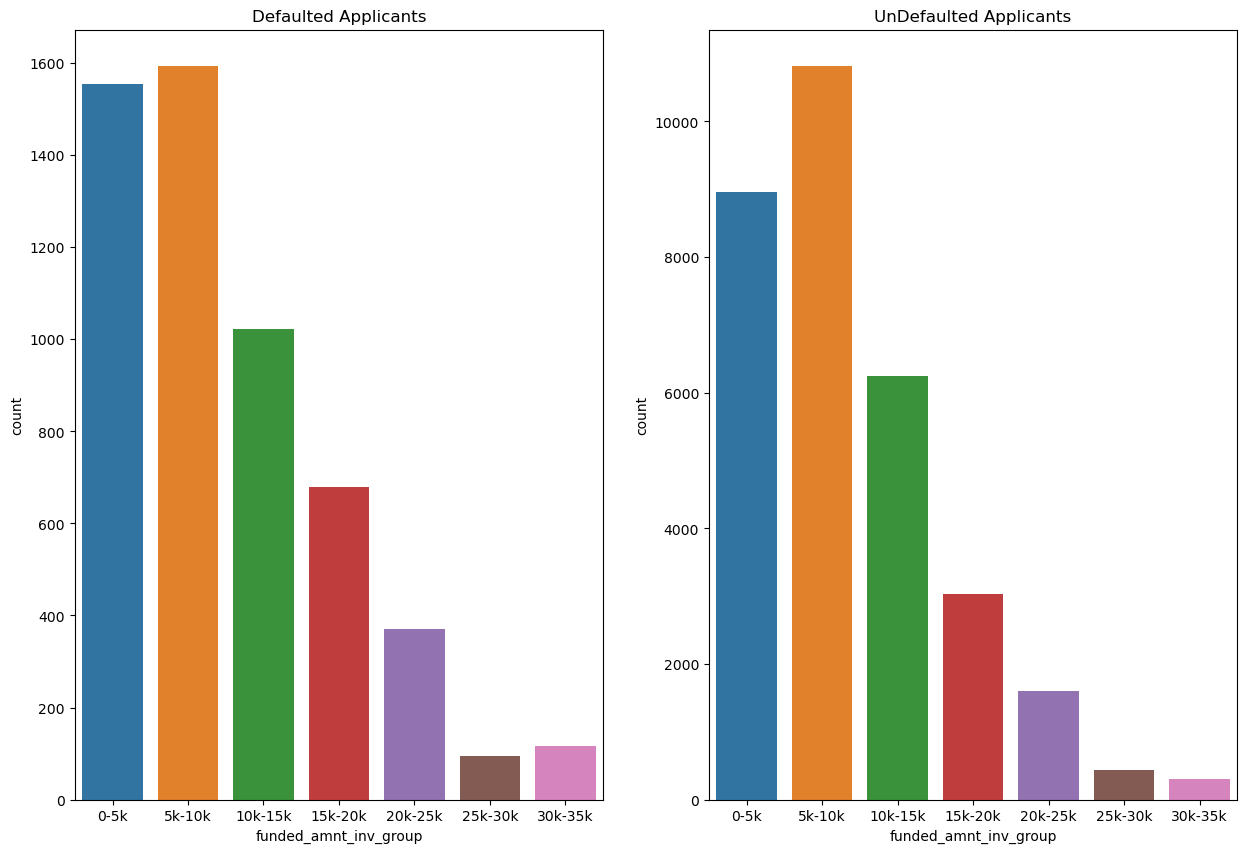

In [164]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='funded_amnt_inv_group', figsize=(15,10))

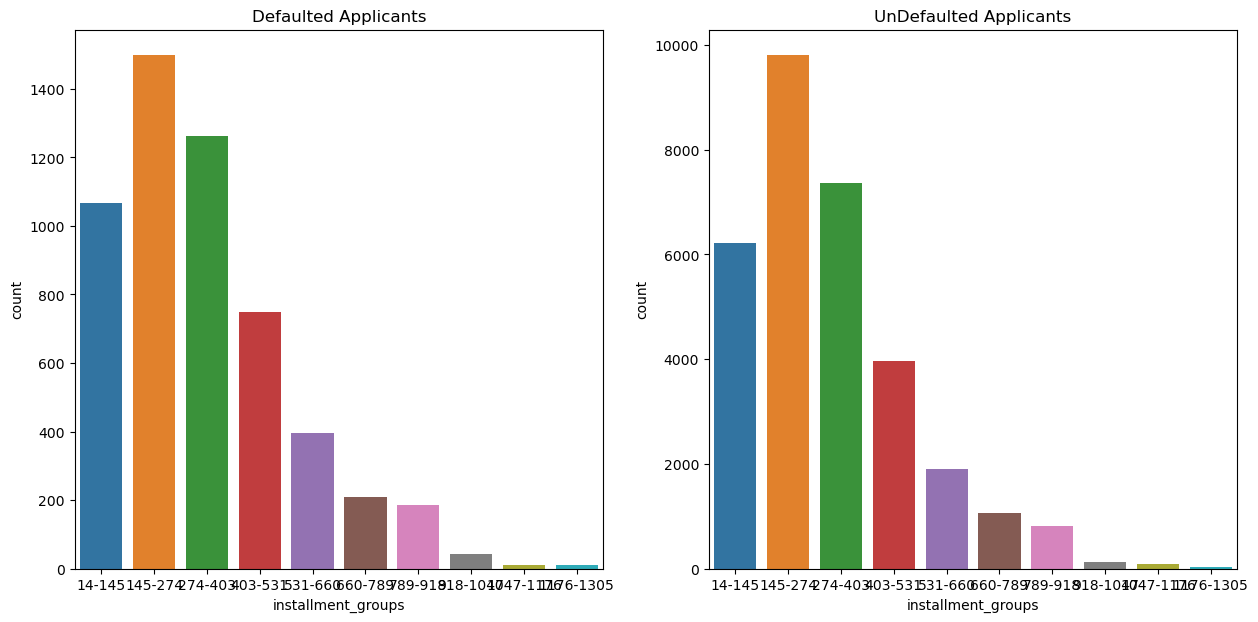

In [165]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='installment_groups')

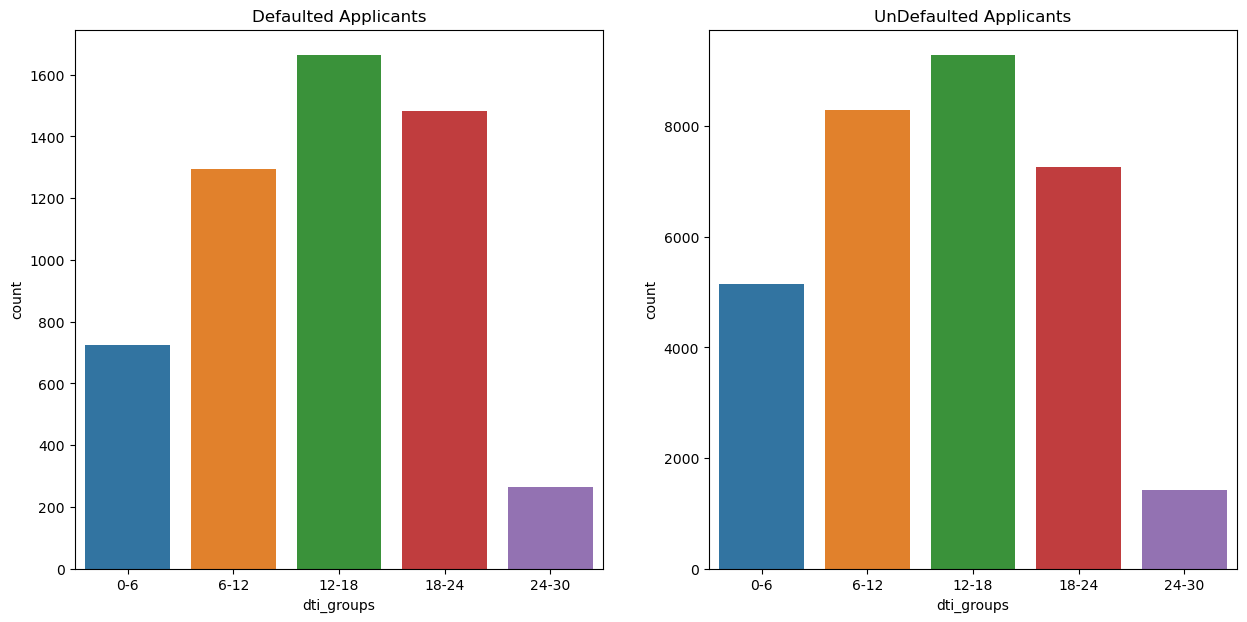

In [166]:
countplot2axes([df_analysis_defaulted, df_analysis_undefaulted], x='dti_groups')

# Observations

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 
- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

### 3.2. Bivariate Analysis

#### Annual income vs loan purpose

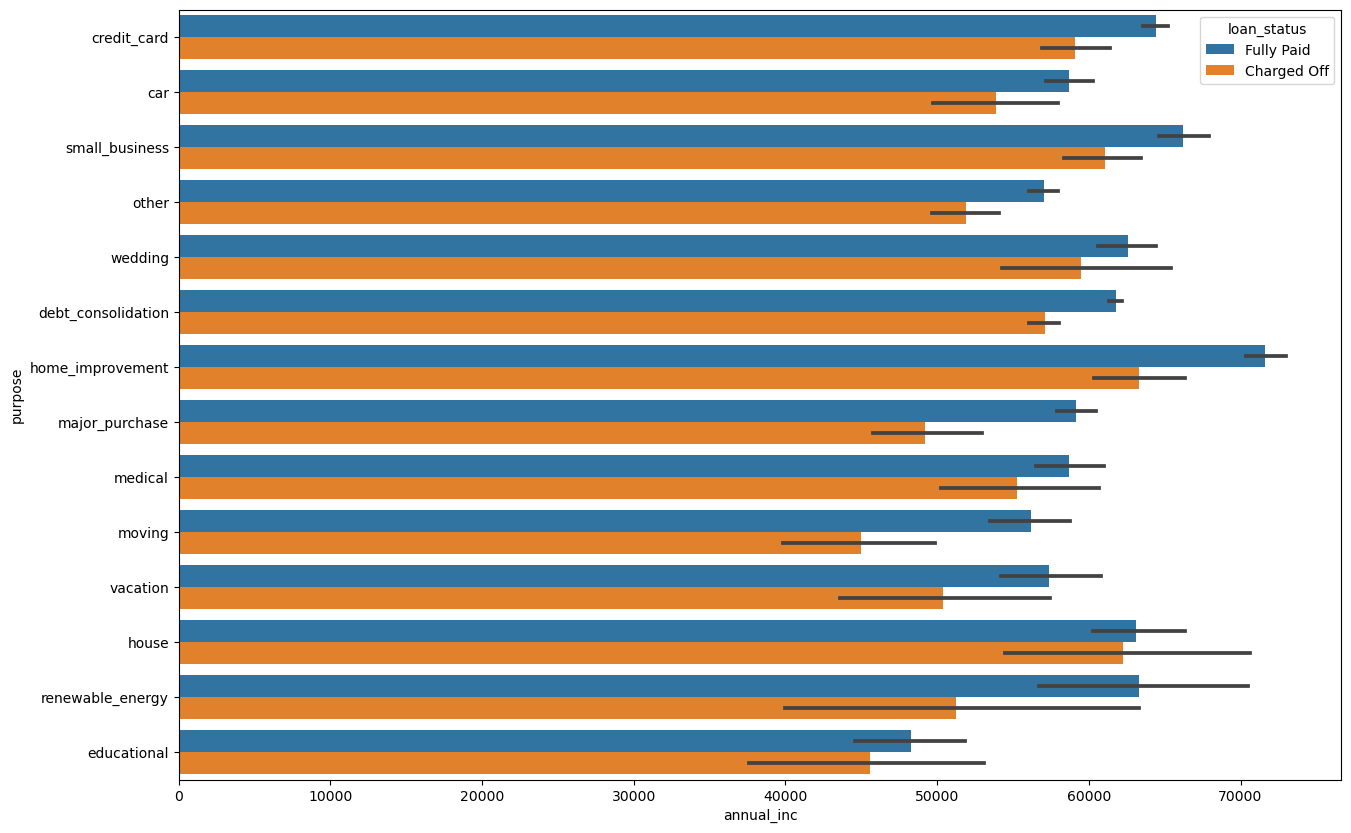

In [167]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_analysis, x='annual_inc', y='purpose', hue='loan_status')
plt.show()

#### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### Annual income vs home ownership

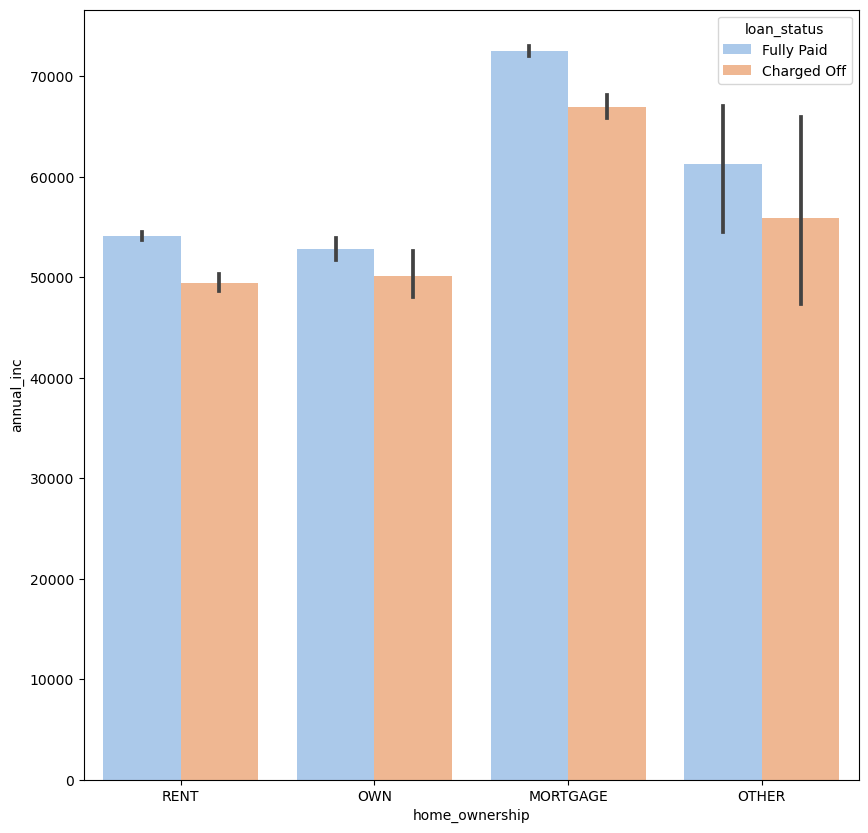

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_analysis,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Annual Income vs Loan amount

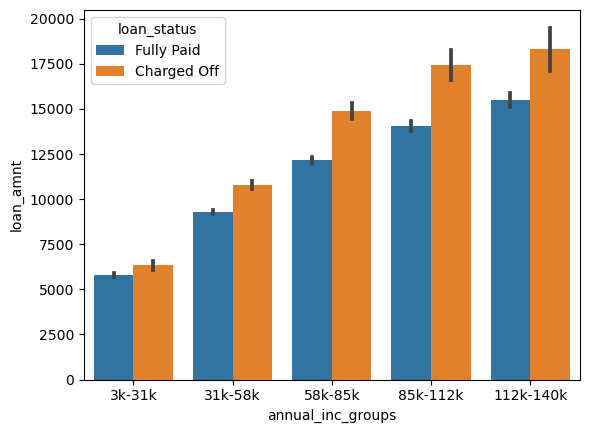

In [169]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = df_analysis)
plt.show()

#### Across all the income groups, the loan_amount is higher for people who defaulted.

#### Annual income vs int_rate

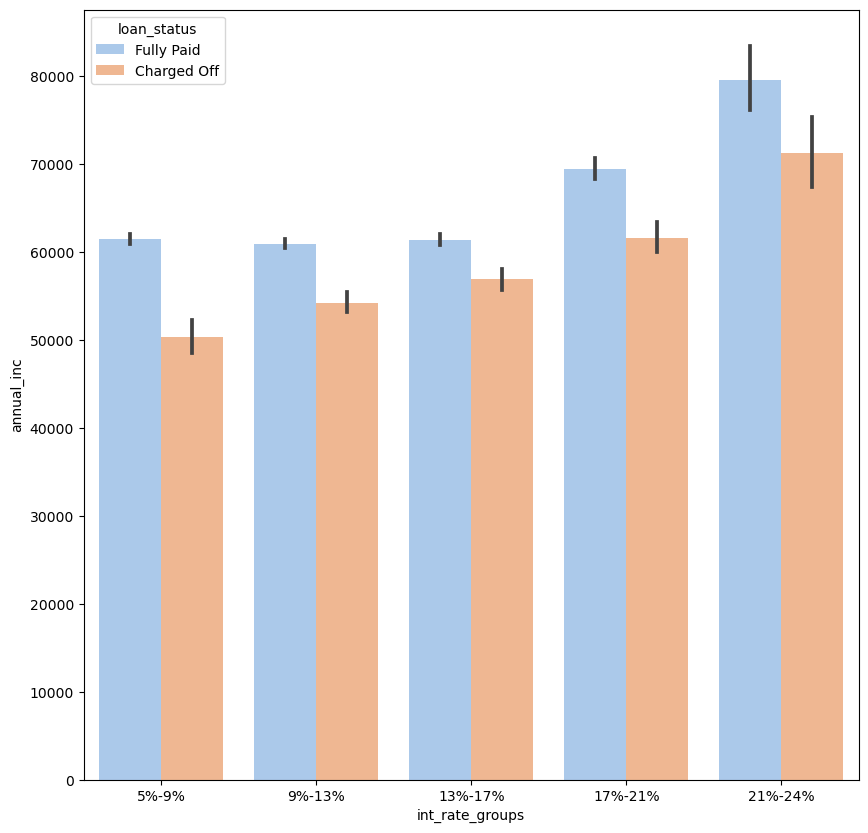

In [170]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analysing loan_amount with other columns for more insights 

#### Loan Amount vs Interest Rate

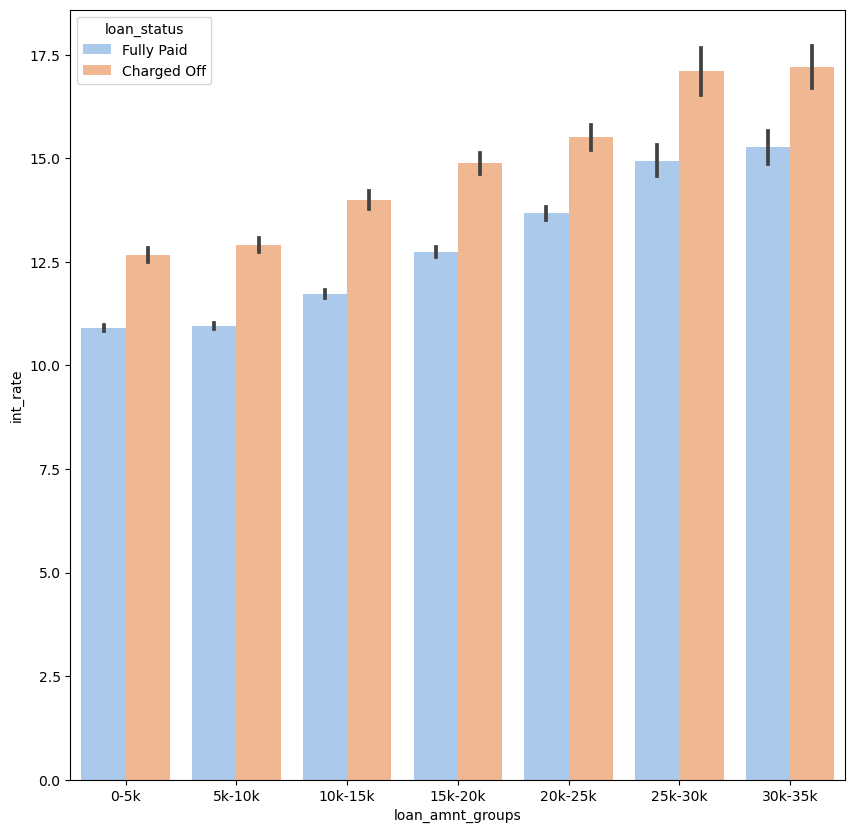

In [171]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs Loan purpose

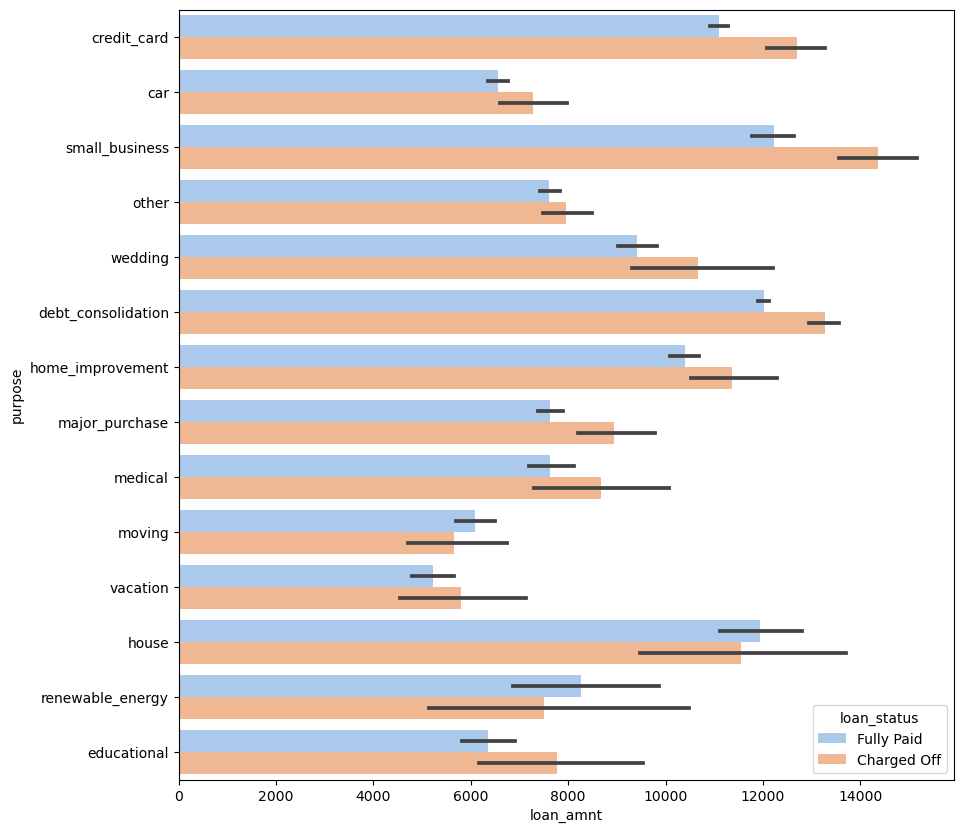

In [172]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs House Ownership

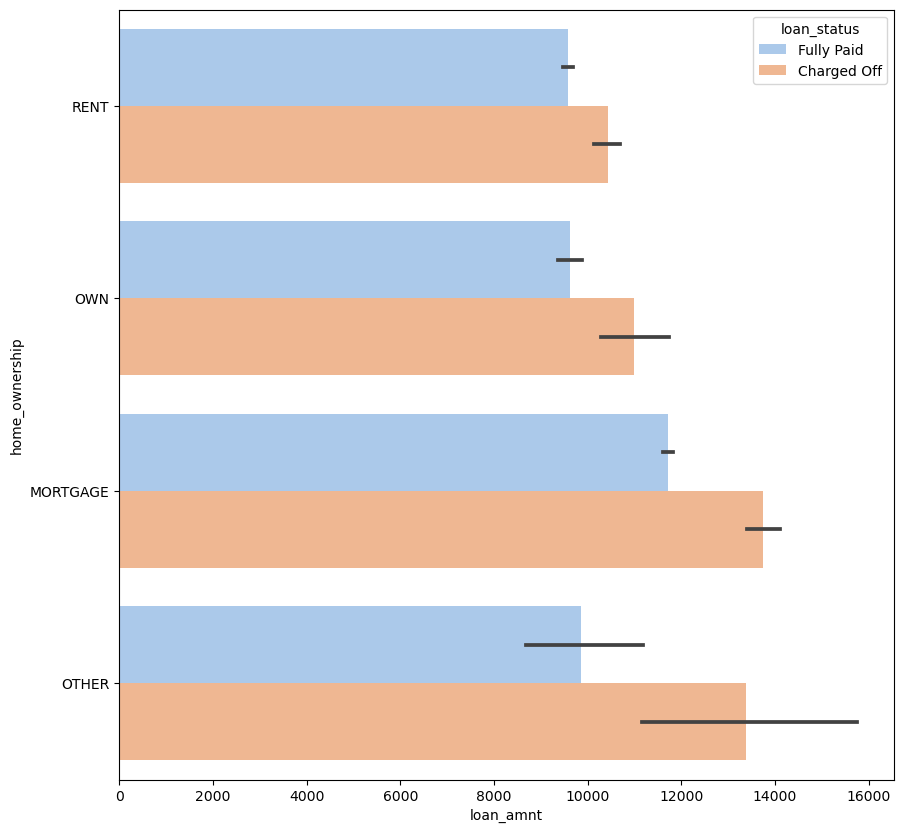

In [173]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs month issued and year issued

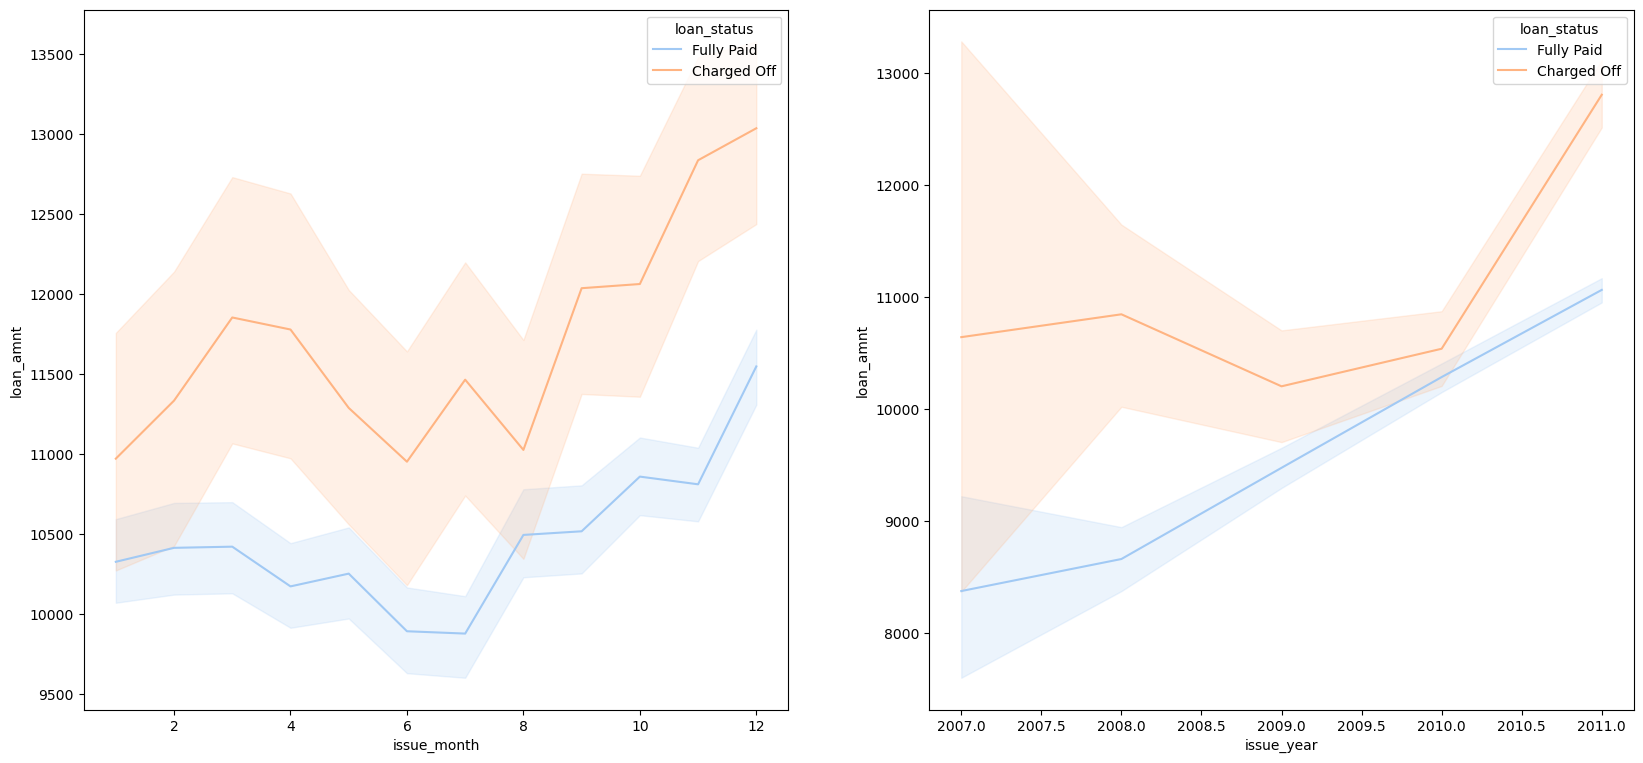

In [174]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df_analysis,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =df_analysis,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Grade

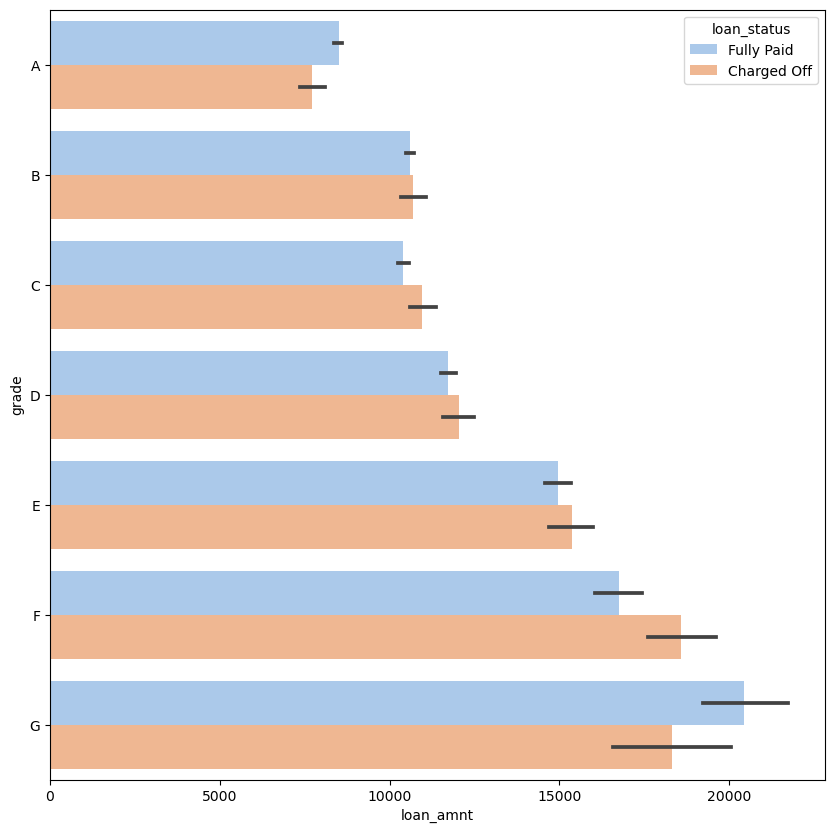

In [175]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

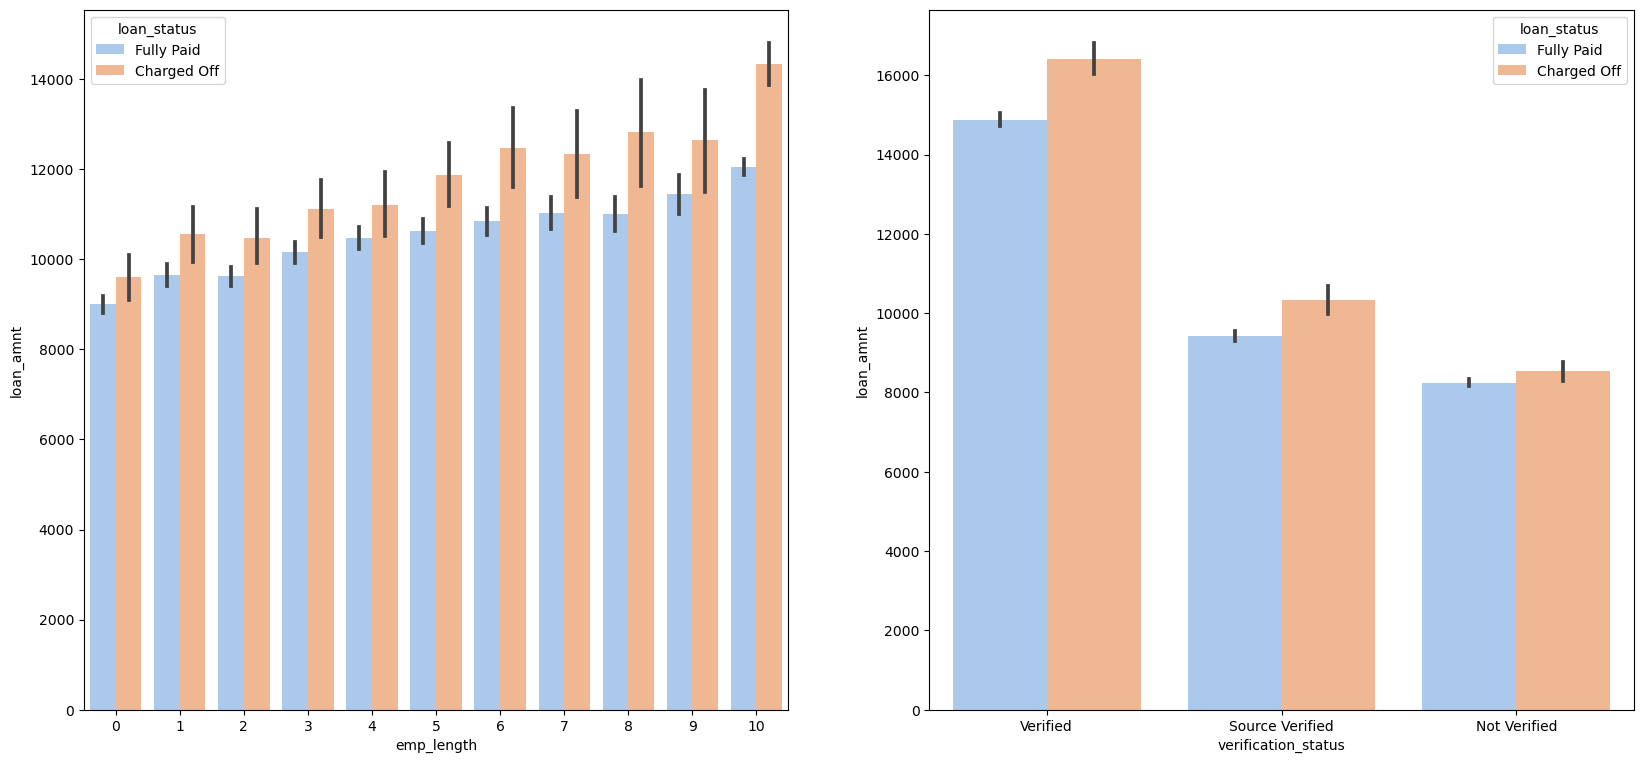

In [176]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df_analysis,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =df_analysis,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")
plt.show()


### Employees with longer working history got the loan approved for a higher amount. 
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

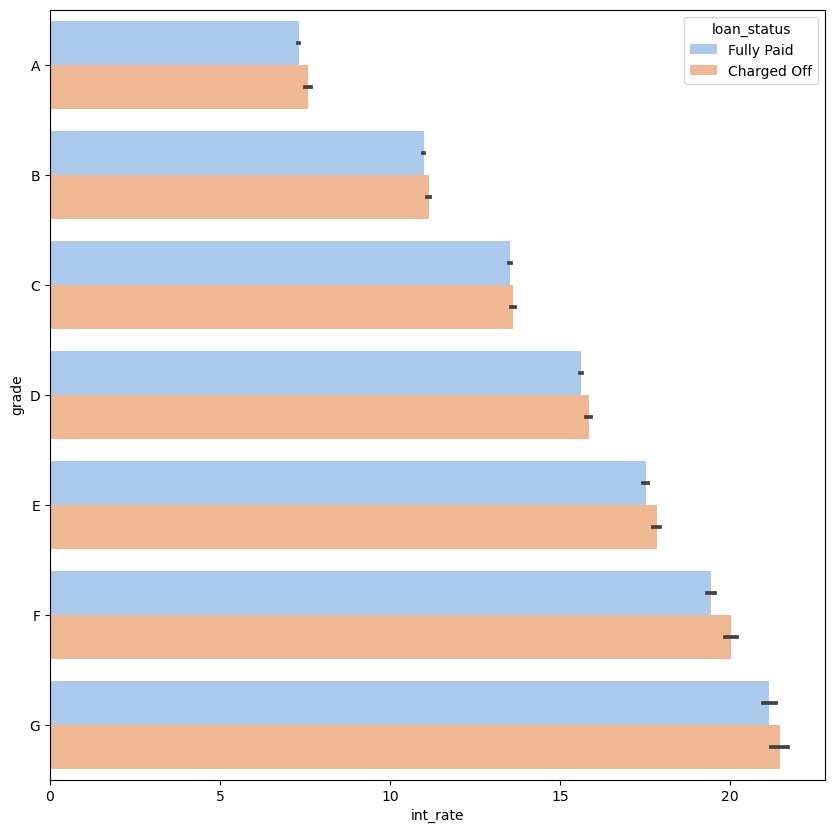

In [177]:
plt.figure(figsize=(10,10))
sns.barplot(data =df_analysis,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

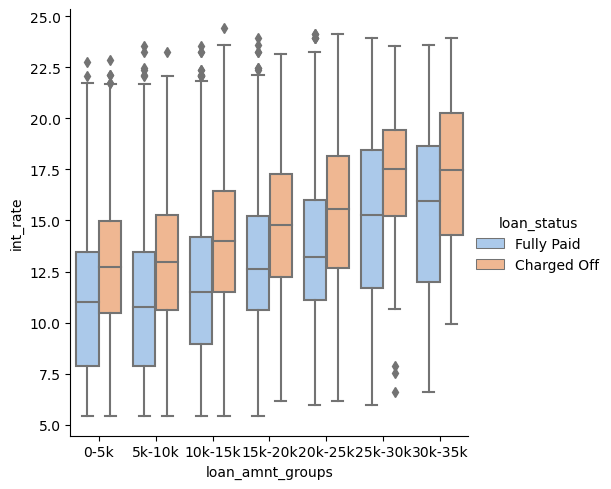

In [178]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =df_analysis,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

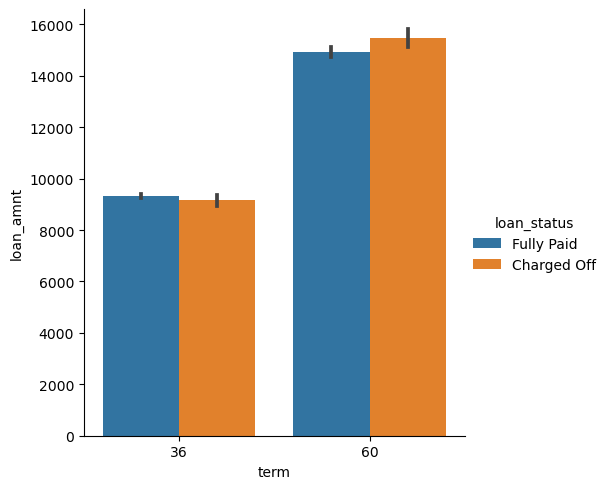

In [179]:
sns.catplot(x = 'term', y = 'loan_amnt', data = df_analysis,hue = 'loan_status', kind = 'bar')
plt.show()

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

# Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when : 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k 
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%

### 3.3. Correlation b/w features

#### Correlation between loan_amnt, int_rate_group and annual_inc_groups

In [180]:
colleration_loan_annual_group = pd.pivot_table(data=df_analysis, values='loan_amnt',index='int_rate_groups' , columns='annual_inc_groups', aggfunc=lambda x: np.mean(x)/10000)
colleration_loan_annual_group

annual_inc_groups,3k-31k,31k-58k,58k-85k,85k-112k,112k-140k
int_rate_groups,,,,,
5%-9%,0.583580,0.789509,0.936829,1.066979,1.206081
9%-13%,0.597037,0.941849,1.243534,1.373995,1.504078
13%-17%,0.568985,1.001834,1.318574,1.526307,1.654540
17%-21%,0.680516,1.295058,1.814069,2.117169,2.162838
21%-24%,0.634583,1.572446,2.128192,2.467228,2.622061


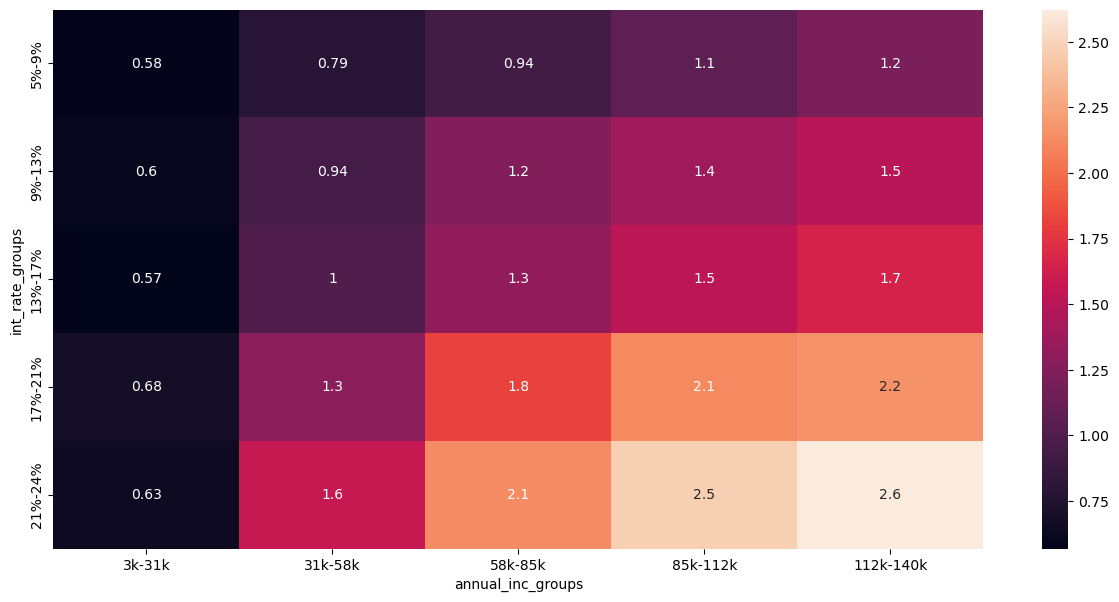

In [181]:
plt.figure(figsize=(15,7))
sns.heatmap(data=colleration_loan_annual_group, annot=True)
plt.show()

#### Correlation between loan_amnt, issue_month and issue_year

In [182]:
colleration_loan_year = pd.pivot_table(data=df_analysis, values='loan_amnt', index='issue_month' , columns='issue_year', aggfunc=lambda x: np.mean(x)/10000)
colleration_loan_year

issue_year,2007,2008,2009,2010,2011
issue_month,,,,,
1,NaN,1.012485,0.905295,1.077707,1.053661
2,NaN,0.947559,0.888567,1.051821,1.101112
3,NaN,1.109989,0.951989,1.003848,1.102788
4,NaN,0.986284,0.904518,1.019509,1.079028
5,NaN,0.585362,0.937590,1.055859,1.075632
6,0.750000,0.579962,0.860162,0.992105,1.061387
7,0.598750,0.638323,0.909510,0.976700,1.078730
8,0.658056,0.568955,0.939114,1.019778,1.132024
9,0.759333,0.573879,0.991723,0.997884,1.152471


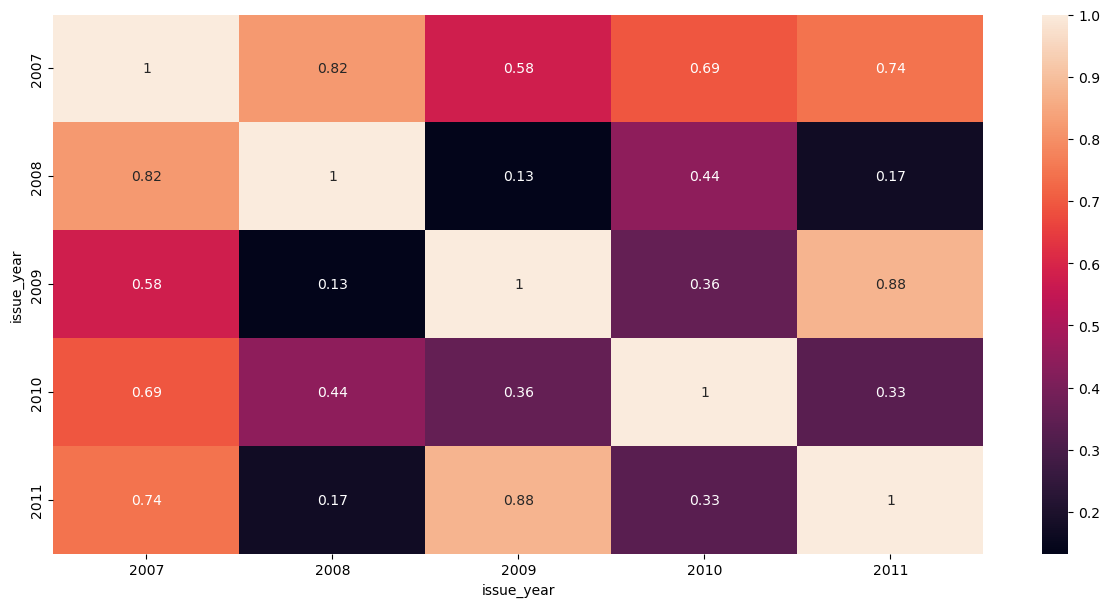

In [183]:
plt.figure(figsize=(15,7))
sns.heatmap(data=colleration_loan_year.corr(), annot=True)
plt.show()

#### Correlation between loan_amnt, issue_month and emp_length

In [184]:
colleration_loan_emp_length = pd.pivot_table(data=df_analysis, values='loan_amnt', index='issue_month' , columns='emp_length', aggfunc=lambda x: round(np.mean(x)/1000,2))
colleration_loan_emp_length

emp_length,0,1,2,3,4,5,6,7,8,9,10
issue_month,,,,,,,,,,,
1,8.83,9.65,9.58,10.25,10.49,11.16,10.02,13.25,10.96,12.00,11.83
2,8.89,9.66,9.94,10.90,10.20,10.61,11.20,11.11,10.14,12.93,11.77
3,9.95,9.44,9.76,10.29,10.70,10.55,10.41,11.02,10.82,11.76,11.94
4,8.94,9.57,9.77,9.45,9.50,10.81,10.16,12.79,11.17,10.14,12.43
5,8.92,9.43,9.34,10.27,10.65,10.20,10.55,11.00,10.72,11.67,11.78
6,9.17,9.30,9.15,9.87,10.20,9.96,10.80,9.56,9.35,11.41,11.26
7,8.35,9.10,9.03,9.71,9.73,10.80,11.53,10.22,10.73,11.73,11.58
8,8.70,9.41,9.48,9.87,9.83,10.72,10.84,12.14,11.78,11.53,12.57
9,8.83,10.11,9.20,10.57,10.90,9.81,10.93,10.60,11.76,10.16,13.09


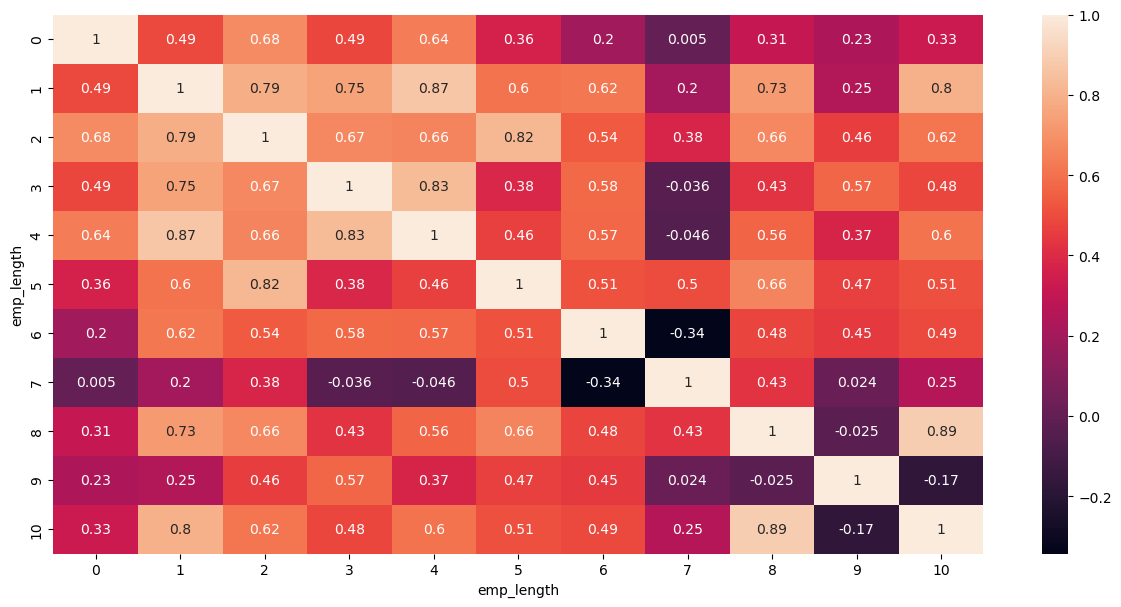

In [185]:
plt.figure(figsize=(15,7))
sns.heatmap(data=colleration_loan_emp_length.corr(), annot=True)
plt.show()

#### Correlation between int_rate, issue_year and emp_length

In [186]:
correlation_int_rate_emp_length = pd.pivot_table(data=df_analysis, values='int_rate', index='issue_year' , columns='emp_length', aggfunc=lambda x: round(np.mean(x),2))
correlation_int_rate_emp_length

emp_length,0,1,2,3,4,5,6,7,8,9,10
issue_year,,,,,,,,,,,
2007,10.37,10.66,10.32,10.63,11.05,9.42,11.16,9.84,11.62,10.07,9.44
2008,10.85,11.09,11.48,11.40,10.98,11.04,11.57,11.39,11.33,11.06,11.12
2009,12.20,12.25,12.29,12.26,12.24,12.31,11.93,12.19,12.09,11.74,11.99
2010,11.59,11.88,11.83,11.79,12.06,11.56,11.63,11.73,11.50,11.66,11.60
2011,11.59,12.07,12.02,11.98,12.06,12.14,12.03,12.23,11.86,11.97,12.11


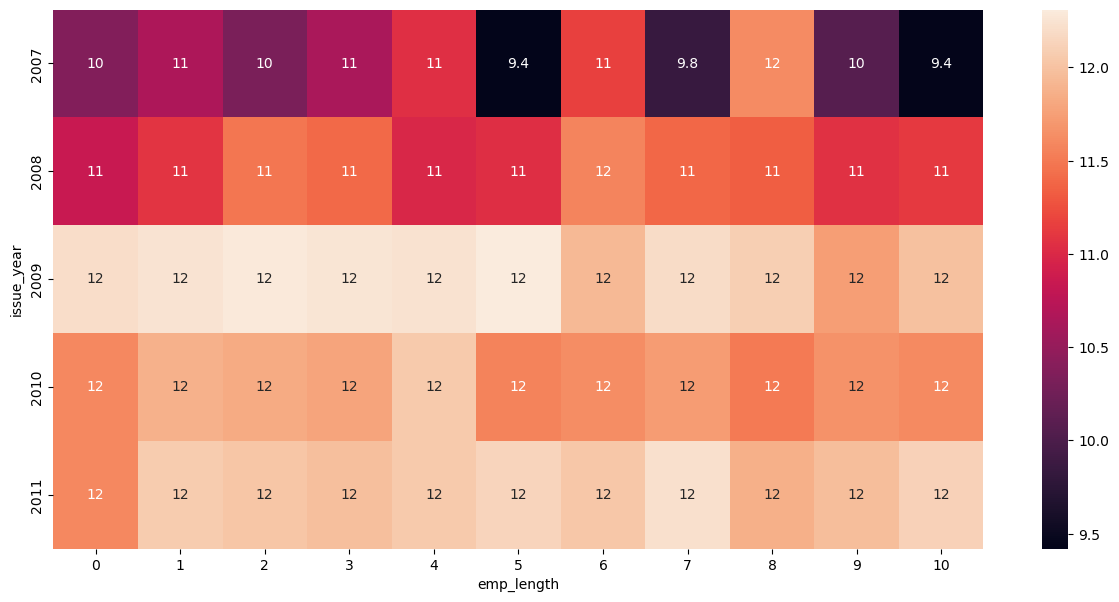

In [187]:
plt.figure(figsize=(15,7))
sns.heatmap(data=correlation_int_rate_emp_length, annot=True)
plt.show()

# Observations

### The above analysis is correlation between some variables. There is a more probability of defaulting when : 

- Applicants are in more dark annual income colors for heat map plt first
- Applicants were applied the most loan in 2009 and 2011 because 2009 and 2011 are having highest correlation value for heat map second.
- Applicant were applied the most loan for employeed 8 and 10 years are having highest correlation value for heat map third.
- Applicant were applied the most interest rate in 2009 to 2011 are having highest correlation value for heat map fourth